In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.base import ClassifierMixin
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


# Evaluation
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
from sklearn.feature_selection import RFE

import gc
import random
import re
from sklearn.metrics import *
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 학습용과 평가용(제출용) 데이터를 읽어들인다.
train = pd.read_csv(os.path.abspath("../input")+'/X_train.csv', encoding='cp949')
test = pd.read_csv(os.path.abspath("../input")+'/X_test.csv', encoding='cp949')

# 학습용 정답 데이터를 읽는다.
y_train = pd.read_csv(os.path.abspath("../input")+'/y_train.csv', encoding='cp949')

In [3]:
y_train

,custid,age
0,0,31
1,2,33
2,3,24
3,4,28
4,5,44
...,...,...
21582,29995,50
21583,29996,23
21584,29997,38
21585,29998,23


In [4]:
train.head()
# 에스티로더_수입종합화장품

,custid,sales_month,sales_day,sales_dayofweek,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,part_nm,team_nm,buyer_nm,import_flg,tot_amt,dis_amt,net_amt,inst_mon,inst_fee
0,0,6,25,일,1212,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,90000,9000,81000,3,0
1,0,6,25,일,1242,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,39000,3900,35100,1,0
2,0,8,26,토,1810,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,잡화가용팀,화장품,1,175000,17500,157500,3,0
3,0,8,26,토,1830,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화파트,잡화가용팀,수입명품,1,455000,45500,409500,3,0
4,0,9,3,일,1802,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,0,100000,10000,90000,3,0


In [5]:
train.shape, test.shape, y_train.shape

((625084, 19), (414955, 19), (21587, 2))

In [6]:
train['sales_time'].sort_values()
# 10:30 ~ 20:00
# 외 시간 ratio

491130      23
368478      33
368477      33
180500     118
160134     900
          ... 
485043    2154
30194     2154
44600     2154
137516    2200
546816    2204
Name: sales_time, Length: 625084, dtype: int64

array([[<AxesSubplot:title={'center':'custid'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

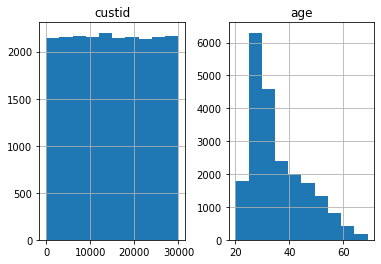

In [7]:
y_train.hist()
# target 분포 정규형에 가깝게 만들어줄 것. ex) log 변환

### EDA

In [8]:
train.head()

,custid,sales_month,sales_day,sales_dayofweek,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,part_nm,team_nm,buyer_nm,import_flg,tot_amt,dis_amt,net_amt,inst_mon,inst_fee
0,0,6,25,일,1212,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,90000,9000,81000,3,0
1,0,6,25,일,1242,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,39000,3900,35100,1,0
2,0,8,26,토,1810,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,잡화가용팀,화장품,1,175000,17500,157500,3,0
3,0,8,26,토,1830,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화파트,잡화가용팀,수입명품,1,455000,45500,409500,3,0
4,0,9,3,일,1802,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,0,100000,10000,90000,3,0


In [9]:
train['sales_month'].value_counts()

16    64733
7     59522
10    58579
6     58302
12    54923
5     51981
15    50104
13    49027
9     48376
11    44991
8     42735
14    41811
Name: sales_month, dtype: int64

In [10]:
test['sales_month'].value_counts()

16    42880
7     39488
6     38644
10    38555
12    36251
5     34331
15    34237
13    33064
9     31811
11    30086
8     27886
14    27722
Name: sales_month, dtype: int64

### Feature Engineering

In [11]:
# 학습용과 평가용(제출용) 데이터를 읽어들인다.
train = pd.read_csv(os.path.abspath("../input")+'/X_train.csv', encoding='cp949')
test = pd.read_csv(os.path.abspath("../input")+'/X_test.csv', encoding='cp949')

# 학습용 정답 데이터를 읽는다.
y_train = pd.read_csv(os.path.abspath("../input")+'/y_train.csv', encoding='cp949')

In [12]:
test.isna().sum()

custid             0
sales_month        0
sales_day          0
sales_dayofweek    0
sales_time         0
str_nm             0
goodcd             0
brd_nm             0
corner_nm          0
pc_nm              0
part_nm            0
team_nm            0
buyer_nm           0
import_flg         0
tot_amt            0
dis_amt            0
net_amt            0
inst_mon           0
inst_fee           0
dtype: int64

In [13]:
numeric_columns = train.dtypes[train.dtypes != 'object'].index.tolist();numeric_columns

['custid',
 'sales_month',
 'sales_day',
 'sales_time',
 'goodcd',
 'import_flg',
 'tot_amt',
 'dis_amt',
 'net_amt',
 'inst_mon',
 'inst_fee']

In [14]:
#train[['tot_amt', 'dis_amt', 'net_amt']] = train[['tot_amt', 'dis_amt', 'net_amt']].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)
#test[['tot_amt', 'dis_amt', 'net_amt']] = test[['tot_amt', 'dis_amt', 'net_amt']].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

In [15]:
#train[numeric_columns] = train[numeric_columns].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)
#test[numeric_columns] = test[numeric_columns].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

In [16]:
train['sales_month_origin'] = train['sales_month']
test['sales_month_origin'] = test['sales_month']

In [17]:
# 2017년, 2018년 분리
train['year'] = train['sales_month_origin'].apply(lambda x: 2018 if x>12 else 2017)
test['year'] = test['sales_month_origin'].apply(lambda x: 2018 if x>12 else 2017)

In [18]:
# 월 정리 (12 초과하는 숫자)
train['sales_month'] = train['sales_month'].apply(lambda x : x-12 if x>12 else x)
test['sales_month'] = test['sales_month'].apply(lambda x : x-12 if x>12 else x)

In [19]:
# 환불금액
train['refund_tot_amt'] = train['tot_amt'].apply(lambda x : -x if x<0 else 0)
train['refund_dis_amt'] = train['dis_amt'].apply(lambda x : -x if x<0 else 0)
train['refund_net_amt'] = train['net_amt'].apply(lambda x : -x if x<0 else 0)

test['refund_tot_amt'] = test['tot_amt'].apply(lambda x : -x if x<0 else 0)
test['refund_dis_amt'] = test['dis_amt'].apply(lambda x : -x if x<0 else 0)
test['refund_net_amt'] = test['net_amt'].apply(lambda x : -x if x<0 else 0)

In [20]:
train['refund_tot_amt_log'] = np.log1p(train['refund_tot_amt'])
train['refund_dis_amt_log'] = np.log1p(train['refund_dis_amt'])
train['refund_net_amt_log'] = np.log1p(train['refund_net_amt'])

test['refund_tot_amt_log'] = np.log1p(test['refund_tot_amt'])
test['refund_dis_amt_log'] = np.log1p(test['refund_dis_amt'])
test['refund_net_amt_log'] = np.log1p(train['refund_net_amt'])

In [21]:
# 구매금액
train['tot_amt>=0'] = train['tot_amt'].apply(lambda x : x if x>=0 else 0)
train['dis_amt>=0'] = train['dis_amt'].apply(lambda x : x if x>=0 else 0)
train['net_amt>=0'] = train['net_amt'].apply(lambda x : x if x>=0 else 0)

test['tot_amt>=0'] = test['tot_amt'].apply(lambda x : x if x>=0 else 0)
test['dis_amt>=0'] = test['dis_amt'].apply(lambda x : x if x>=0 else 0)
test['net_amt>=0'] = test['net_amt'].apply(lambda x : x if x>=0 else 0)

In [22]:
train['tot_amt_log>=0'] = np.log1p(train['tot_amt>=0'])
train['dis_amt_log>=0'] = np.log1p(train['dis_amt>=0'])
train['net_amt_log>=0'] = np.log1p(train['net_amt>=0'])

test['tot_amt_log>=0'] = np.log1p(test['tot_amt>=0'])
test['dis_amt_log>=0'] = np.log1p(test['dis_amt>=0'])
test['net_amt_log>=0'] = np.log1p(test['net_amt>=0'])

In [23]:
# 구매비율
train['net_amt_ratio'] = train['net_amt>=0'] / train['tot_amt>=0']
train['dis_amt_ratio'] = train['dis_amt>=0'] / train['tot_amt>=0']
train['dis_net_ratio'] = train['dis_amt>=0'] / train['net_amt>=0']

test['net_amt_ratio'] = test['net_amt>=0'] / test['tot_amt>=0']
test['dis_amt_ratio'] = test['dis_amt>=0'] / test['tot_amt>=0']
test['dis_net_ratio'] = test['dis_amt>=0'] / test['net_amt>=0']

In [24]:
# 백화점 영업시간
train['sales_time_open'] = train['sales_time'].apply(lambda x : 1 if (x > 1030) and (x < 2000) else 0)
test['sales_time_open'] = test['sales_time'].apply(lambda x : 1 if (x > 1030) and (x < 2000) else 0)

In [25]:
# 계절 분리
train['sales_season'] = train['sales_month'].apply(lambda x : 'SPRING' if (x>=3) and (x<=5)
                                                  else 'SUMMER' if (x>=6) and (x<=8)
                                                  else 'FALL' if (x>=9) and (x<=11)
                                                  else 'WINTER')

test['sales_season'] = test['sales_month'].apply(lambda x : 'SPRING' if (x>=3) and (x<=5)
                                                  else 'SUMMER' if (x>=6) and (x<=8)
                                                  else 'FALL' if (x>=9) and (x<=11)
                                                  else 'WINTER')

In [26]:
# 분기 분리
train['quarter'] = pd.cut(train['sales_month'], bins = [1, 4, 7, 10, 12], 
                              right = False, labels = [1, 2, 3, 4]).astype('category')
test['quarter'] = pd.cut(test['sales_month'], bins = [1, 4, 7, 10, 12], 
                              right = False, labels = [1, 2, 3, 4]).astype('category')

In [27]:
# 1달 초,중,말 분리
train['month_group'] = pd.cut(train['sales_day'], bins = [1, 10, 20, 31], 
                              right = False, labels = ['Cho', 'Jung', 'Mal'])

test['month_group'] = pd.cut(test['sales_day'], bins = [1, 10, 20, 31], 
                              right = False, labels = ['Cho', 'Jung', 'Mal'])

In [28]:
# 주말 분리
train['weekend'] = train['sales_dayofweek'].apply(lambda x : 1 if (x=='토') or (x=='일') else 0)
test['weekend'] = test['sales_dayofweek'].apply(lambda x : 1 if (x=='토') or (x=='일') else 0)

In [29]:
# 할부 여부
train['inst'] = train['inst_mon'].apply(lambda x : 1 if x>1 else 0)
test['inst'] = test['inst_mon'].apply(lambda x : 1 if x>1 else 0)

In [30]:
# datetime 처리
train['year_month_day'] = train['year'].astype(str) + '_' + train['sales_month'].astype(str) + '_' + train['sales_day'].astype(str) + '_' + train['sales_time'].astype(str)
test['year_month_day'] = test['year'].astype(str) + '_' +test['sales_month'].astype(str) + '_' + test['sales_day'].astype(str) + '_' + test['sales_time'].astype(str)

train['datetime'] = pd.to_datetime(train['year_month_day'], format = '%Y_%m_%d_%H%M')
test['datetime'] = pd.to_datetime(test['year_month_day'], format = '%Y_%m_%d_%H%M')

In [31]:
# 방문주기 : 몇일 간격으로 구매가 이뤄졌는지
train['diff_time'] = train.groupby('custid')['datetime'].diff().fillna('00:00:00').astype(str)
train['diff_time'] = train['diff_time'].str.split(' days').apply(lambda x: 0 if x[0] == '00:00:00' else x[0]).astype(int)

test['diff_time'] = test.groupby('custid')['datetime'].diff().fillna('00:00:00').astype(str)
test['diff_time'] = test['diff_time'].str.split(' days').apply(lambda x: 0 if x[0] == '00:00:00' else x[0]).astype(int)

In [32]:
# 쇼핑간격 : 같은 날 몇분 간격으로 구매가 이뤄졌는지
train['day'] = train['year'].astype(str) + '_' + train['sales_month'].astype(str) + '_' + train['sales_day'].astype(str)
train['shopping_gap_open'] = train.query('sales_time_open == 1').groupby(['custid', 'day'])['datetime'].diff().dt.total_seconds().fillna(0).div(60).astype(int)
train['shopping_gap_open'] = train['shopping_gap_open'].fillna(0)

test['day'] = test['year'].astype(str) + '_' + test['sales_month'].astype(str) + '_' + test['sales_day'].astype(str)
test['shopping_gap_open'] = test.query('sales_time_open == 1').groupby(['custid', 'day'])['datetime'].diff().dt.total_seconds().fillna(0).div(60).astype(int)
test['shopping_gap_open'] = test['shopping_gap_open'].fillna(0)

In [33]:
# 백화점 닫힌 시간 쇼핑간격
#train['shopping_gap_close'] = train.query('sales_time_open == 0').groupby(['custid', 'day'])['datetime'].diff().dt.total_seconds().fillna(0).div(60).astype(int)
#train['shopping_gap_close'] = train['shopping_gap_close'].fillna(0)

#test['shopping_gap_close'] = test.query('sales_time_open == 0').groupby(['custid', 'day'])['datetime'].diff().dt.total_seconds().fillna(0).div(60).astype(int)
#test['shopping_gap_close'] = train['shopping_gap_close'].fillna(0)

In [34]:
# 내점 시 구매 간격
train['shopping_gap'] = train.groupby(['custid', 'day'])['datetime'].diff().dt.total_seconds().fillna(0).div(60).astype(int)
train['shopping_gap'] = train['shopping_gap'].fillna(0)

test['shopping_gap'] = test.groupby(['custid', 'day'])['datetime'].diff().dt.total_seconds().fillna(0).div(60).astype(int)
test['shopping_gap'] = test['shopping_gap'].fillna(0)

In [35]:
# 요일명을 영어로 변경 - lgbm에서 한글 피처 명이 있으면 안됨
train['sales_dayofweek'] = train['sales_dayofweek'].apply(lambda x : 'MONDAY' if x == '월'
                                                         else 'TUESDAY' if x == '화'
                                                         else 'WEDNESDAY' if x == '수'
                                                         else 'THURSDAY' if x == '목'
                                                         else 'FRIDAY' if x == '금'
                                                         else 'SATURDAY' if x == '토'
                                                         else 'SUNDAY')

test['sales_dayofweek'] = test['sales_dayofweek'].apply(lambda x : 'MONDAY' if x == '월'
                                                         else 'TUESDAY' if x == '화'
                                                         else 'WEDNESDAY' if x == '수'
                                                         else 'THURSDAY' if x == '목'
                                                         else 'FRIDAY' if x == '금'
                                                         else 'SATURDAY' if x == '토'
                                                         else 'SUNDAY')

In [36]:
# 지점명을 영어로 변경
train['str_nm'] = train['str_nm'].apply(lambda x : 'MUYEOK_BRANCH' if x == '무역점'
                                                         else 'SHINCHON_BRANCH' if x == '신촌점'
                                                         else 'HEAD_OFFICE' if x == '본점'
                                                         else 'CHUNHO_BRANCH')

test['str_nm'] = test['str_nm'].apply(lambda x : 'MUYEOK_BRANCH' if x == '무역점'
                                                         else 'SHINCHON_BRANCH' if x == '신촌점'
                                                         else 'HEAD_OFFICE' if x == '본점'
                                                         else 'CHUNHO_BRANCH')

In [37]:
# 시간대 구분 (회사원 기준)
train['time_split'] = train['sales_time'].apply(lambda x : 'MORNINGTIME' if (x>=700) and (x<=1130)
                                               else 'LUNCHTIME' if (x>1130) and (x<=1300)
                                               else 'AFTERNOON' if (x>1300) and (x<=1900)
                                               else 'RESTTIME')

test['time_split'] = test['sales_time'].apply(lambda x : 'MORNINGTIME' if (x>=700) and (x<=1130)
                                               else 'LUNCHTIME' if (x>1130) and (x<=1300)
                                               else 'AFTERNOON' if (x>1300) and (x<=1900)
                                               else 'RESTTIME')

In [38]:
# 무이자 혜택 카드 사용 여부 / 롯데백화점 무이자 조건 참고함.
train['card_friendly'] = train.query('net_amt >= 50000 and inst_mon > 1')['inst_fee'].apply(lambda x : 1 if x == 0 else 0)
test['card_friendly'] = test.query('net_amt >= 50000 and inst_mon > 1')['inst_fee'].apply(lambda x : 1 if x == 0 else 0)

In [39]:
train['card_friendly'] = train['card_friendly'].fillna(0)
test['card_friendly'] = test['card_friendly'].fillna(0)

In [40]:
# 환불여부
train['refund'] = train['tot_amt'].apply(lambda x: 1 if x<0 else 0)
test['refund'] = test['tot_amt'].apply(lambda x: 1 if x<0 else 0)

In [41]:
# 내점시 구매건수 1건
train['1shopping'] = train['shopping_gap'].apply(lambda x : 1 if x == 0 else 0)
test['1shopping'] = test['shopping_gap'].apply(lambda x : 1 if x == 0 else 0)

In [42]:
# 연령대별 브랜드 선호도에 따른 가중치
df = pd.merge(train, y_train, on = 'custid')
train['age_group'] = df['age'].apply(lambda x : 'twenty' if (x>=20) & (x<30)
                                     else 'thirty' if (x>=30) & (x<40)
                                     else 'forty' if (x>=40) & (x<50)
                                     else 'fifty' if (x>=50) & (x<60)
                                     else 'sixty')

twenty_prefer_brd = train[train['age_group'] == 'twenty'].brd_nm.value_counts().index[1:].to_list()
thirty_prefer_brd = train[train['age_group'] == 'thirty'].brd_nm.value_counts().index[1:].to_list()
forty_prefer_brd = train[train['age_group'] == 'forty'].brd_nm.value_counts().index[1:].to_list()
fifty_prefer_brd = train[train['age_group'] == 'fifty'].brd_nm.value_counts().index[1:].to_list()
sixty_prefer_brd = train[train['age_group'] == 'sixty'].brd_nm.value_counts().index[1:].to_list()

def prefer_brd(x, list):
    for i in range(len(list)):
        if(x == list[i]):
            return len(list)-i

train['20_weight'] = train['brd_nm'].apply(lambda x: prefer_brd(x, twenty_prefer_brd)).fillna(0)
train['30_weight'] = train['brd_nm'].apply(lambda x: prefer_brd(x, thirty_prefer_brd)).fillna(0)
train['40_weight'] = train['brd_nm'].apply(lambda x: prefer_brd(x, forty_prefer_brd)).fillna(0)
train['50_weight'] = train['brd_nm'].apply(lambda x: prefer_brd(x, fifty_prefer_brd)).fillna(0)
train['60_weight'] = train['brd_nm'].apply(lambda x: prefer_brd(x, sixty_prefer_brd)).fillna(0)

test['20_weight'] = test['brd_nm'].apply(lambda x: prefer_brd(x, twenty_prefer_brd)).fillna(0)
test['30_weight'] = test['brd_nm'].apply(lambda x: prefer_brd(x, thirty_prefer_brd)).fillna(0)
test['40_weight'] = test['brd_nm'].apply(lambda x: prefer_brd(x, forty_prefer_brd)).fillna(0)
test['50_weight'] = test['brd_nm'].apply(lambda x: prefer_brd(x, fifty_prefer_brd)).fillna(0)
test['60_weight'] = test['brd_nm'].apply(lambda x: prefer_brd(x, sixty_prefer_brd)).fillna(0)

train['weight_sum'] = train['20_weight'] + train['30_weight'] + train['40_weight'] + train['50_weight'] + train['60_weight']
test['weight_sum'] = test['20_weight'] + test['30_weight'] + test['40_weight'] + test['50_weight'] + test['60_weight']

#### Numeric Feature

In [43]:
numeric_columns = train.dtypes[train.dtypes != 'object'].index.tolist()
train[numeric_columns].head()
#features[num_features] = features[num_features].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

,custid,sales_month,sales_day,sales_time,goodcd,import_flg,tot_amt,dis_amt,net_amt,inst_mon,...,shopping_gap,card_friendly,refund,1shopping,20_weight,30_weight,40_weight,50_weight,60_weight,weight_sum
0,0,6,25,1212,2116050008000,1,90000,9000,81000,3,...,0,1.0,0,1,1580.0,1708.0,1658.0,1505.0,1205.0,7656.0
1,0,6,25,1242,4125440008000,1,39000,3900,35100,1,...,30,0.0,0,0,1572.0,1702.0,1654.0,1501.0,1202.0,7631.0
2,0,8,26,1810,2116052008000,1,175000,17500,157500,3,...,0,1.0,0,1,1582.0,1706.0,1653.0,1500.0,1198.0,7639.0
3,0,8,26,1830,4106430119900,1,455000,45500,409500,3,...,20,1.0,0,0,1020.0,1087.0,1038.0,1089.0,989.0,5223.0
4,0,9,3,1802,2139141008000,0,100000,10000,90000,3,...,0,1.0,0,1,1584.0,1711.0,1657.0,1504.0,1203.0,7659.0


In [49]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#train[['tot_amt', 'dis_amt', 'net_amt']] = scaler.fit_transform(train[['tot_amt', 'dis_amt', 'net_amt']])
#test[['tot_amt', 'dis_amt', 'net_amt']] = scaler.transform(test[['tot_amt', 'dis_amt', 'net_amt']])

In [50]:
features = []
features_te = []

##### simple aggregation

In [51]:
agg_dict = {
    # 기존 컬럼
    'custid':['count'],
    'sales_time':['min', 'max', 'std'],
    'goodcd':['nunique'],
    'import_flg':['mean', 'sum', 'nunique'],
    'tot_amt':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'dis_amt':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'net_amt':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'inst_mon':['min', 'max','mean', 'sum', 'std', 'skew'],
    'inst_fee':['mean', 'sum', 'nunique'],
    'sales_dayofweek':['nunique'],
    'brd_nm': [('brd_nm_nunique', lambda x: x.nunique()), 
               ('brd_nm_ratio', lambda x: x.nunique()/x.count())],
   
    # 추가 가공 컬럼
    'tot_amt>=0':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'dis_amt>=0':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'net_amt>=0':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'refund_tot_amt':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'refund_dis_amt':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'refund_net_amt':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'refund_tot_amt_log':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'refund_dis_amt_log':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'refund_net_amt_log':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'tot_amt_log>=0':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'dis_amt_log>=0':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'net_amt_log>=0':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'net_amt_ratio':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'dis_amt_ratio':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'dis_net_ratio':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'sales_time_open':['mean', 'sum'],
    'weekend':['mean', 'sum'],
    'inst':['mean', 'sum'],
    'diff_time':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'shopping_gap_open':['min', 'max','mean', 'sum', 'std', 'skew'],
    'card_friendly':['mean', 'sum'],
    'shopping_gap':['min', 'max', 'mean', 'sum', 'std', 'skew'],
}

In [52]:
f = train.groupby('custid').agg(agg_dict)
f = f.fillna(0)
f.columns = [('_').join(column).upper() for column in f.columns.ravel()]

# 카드 무이자 혜택 사용한 고객 비율
f['cf_cc_ratio'] = f['CARD_FRIENDLY_MEAN'] / f['CUSTID_COUNT']

# 구매 비율
f['tot_dis_log_ratio'] = f['DIS_AMT_LOG>=0_SUM'] / f['TOT_AMT_LOG>=0_SUM']
f['tot_net_log_ratio'] = f['NET_AMT_LOG>=0_SUM'] / f['TOT_AMT_LOG>=0_SUM']
f['dis_net_log_ratio'] = f['DIS_AMT_LOG>=0_SUM'] / f['NET_AMT_LOG>=0_SUM']

# 백화점 영업시간에 쇼핑한 비율
f['open_gap_sum_ratio'] = (f['SHOPPING_GAP_OPEN_SUM'] / f['SHOPPING_GAP_SUM']).fillna(0)

f = f.reset_index()
features.append(f); display(f)

,custid,CUSTID_COUNT,SALES_TIME_MIN,SALES_TIME_MAX,SALES_TIME_STD,GOODCD_NUNIQUE,IMPORT_FLG_MEAN,IMPORT_FLG_SUM,IMPORT_FLG_NUNIQUE,TOT_AMT_MIN,...,SHOPPING_GAP_MAX,SHOPPING_GAP_MEAN,SHOPPING_GAP_SUM,SHOPPING_GAP_STD,SHOPPING_GAP_SKEW,cf_cc_ratio,tot_dis_log_ratio,tot_net_log_ratio,dis_net_log_ratio,open_gap_sum_ratio
0,0,11,1212,1930,266.443786,7,0.636364,7,2,39000,...,48,12.545455,138,18.635255,1.079753,0.082645,0.804362,0.991048,0.811628,1.000000
1,2,11,1050,1920,352.567002,7,0.090909,1,2,-1416000,...,30,4.545455,50,10.357255,2.127388,0.024793,0.623121,0.993722,0.627057,1.000000
2,3,30,1113,1943,274.230199,22,0.000000,0,1,-621000,...,50,12.100000,363,14.179514,1.092931,0.020000,0.493403,0.996948,0.494913,1.000000
3,4,4,1403,1450,21.087121,4,0.250000,1,2,49000,...,40,11.750000,47,19.120234,1.830569,0.062500,0.372814,0.997857,0.373614,1.000000
4,5,32,1100,1912,314.365407,22,0.187500,6,2,20335,...,40,5.562500,178,9.728367,2.143863,0.013672,0.556639,0.993894,0.560058,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,76,1023,1913,231.999093,57,0.105263,8,2,-1206000,...,80,14.552632,1106,21.756467,1.475490,0.005367,0.611293,0.996477,0.613454,0.970163
21583,29996,19,1240,1912,268.480890,9,0.105263,2,2,-205000,...,18,2.736842,52,5.424657,1.878535,0.005540,0.601835,0.993031,0.606059,1.000000
21584,29997,20,1250,1730,133.563153,13,0.050000,1,2,9000,...,280,34.800000,696,63.256870,3.352420,0.007500,0.185006,0.997598,0.185451,1.000000
21585,29998,13,1303,1903,182.203007,12,0.000000,0,1,-55000,...,63,11.076923,144,20.738296,1.927127,0.041420,0.412812,0.997257,0.413947,1.000000


In [53]:
f_te = test.groupby('custid').agg(agg_dict)
f_te = f_te.fillna(0)
f_te.columns = [('_').join(column).upper() for column in f_te.columns.ravel()]

f_te['cf_cc_ratio'] = f_te['CARD_FRIENDLY_MEAN'] / f_te['CUSTID_COUNT']

f_te['tot_dis_log_ratio'] = (f_te['DIS_AMT_LOG>=0_SUM'] / f_te['TOT_AMT_LOG>=0_SUM']).fillna(0)
f_te['tot_net_log_ratio'] = (f_te['NET_AMT_LOG>=0_SUM'] / f_te['TOT_AMT_LOG>=0_SUM']).fillna(0)
f_te['dis_net_log_ratio'] = (f_te['DIS_AMT_LOG>=0_SUM'] / f_te['NET_AMT_LOG>=0_SUM']).fillna(0)

f_te['open_gap_sum_ratio'] = (f_te['SHOPPING_GAP_OPEN_SUM'] / f_te['SHOPPING_GAP_SUM']).fillna(0)

f_te = f_te.reset_index()
features_te.append(f_te); display(f_te)

,custid,CUSTID_COUNT,SALES_TIME_MIN,SALES_TIME_MAX,SALES_TIME_STD,GOODCD_NUNIQUE,IMPORT_FLG_MEAN,IMPORT_FLG_SUM,IMPORT_FLG_NUNIQUE,TOT_AMT_MIN,...,SHOPPING_GAP_MAX,SHOPPING_GAP_MEAN,SHOPPING_GAP_SUM,SHOPPING_GAP_STD,SHOPPING_GAP_SKEW,cf_cc_ratio,tot_dis_log_ratio,tot_net_log_ratio,dis_net_log_ratio,open_gap_sum_ratio
0,30001,27,1643,1910,66.812810,20,0.074074,2,2,-64700,...,50,12.111111,327,15.400633,1.093679,0.013717,0.398740,0.997672,0.399671,1.0
1,30002,102,1050,1930,246.124194,48,0.245098,25,2,-410000,...,260,14.470588,1476,33.977775,5.782726,0.004902,0.529315,0.996861,0.530981,1.0
2,30003,47,1243,1930,224.386309,28,0.106383,5,2,-138000,...,50,4.127660,194,9.104746,3.298368,0.003169,0.301344,0.997593,0.302071,1.0
3,30005,1,1903,1903,0.000000,1,1.000000,1,1,57000,...,0,0.000000,0,0.000000,0.000000,1.000000,0.726468,0.995316,0.729887,0.0
4,30007,6,1540,1933,159.075663,6,0.166667,1,2,29000,...,13,3.833333,23,6.013873,1.075087,0.027778,0.483311,0.996820,0.484853,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,4,1220,1800,285.116935,4,0.250000,1,2,52000,...,10,5.000000,20,5.773503,0.000000,0.187500,0.741166,0.995568,0.744465,1.0
14376,49990,1,1503,1503,0.000000,1,1.000000,1,1,213000,...,0,0.000000,0,0.000000,0.000000,0.000000,0.755837,0.995819,0.759011,0.0
14377,49992,2,1740,1853,79.903066,2,0.500000,1,2,53000,...,0,0.000000,0,0.000000,0.000000,0.000000,0.738496,0.995522,0.741818,0.0
14378,49993,4,1630,1833,84.472382,3,0.000000,0,1,20000,...,43,30.750000,123,20.548723,-1.971170,0.000000,0.197185,0.998761,0.197430,1.0


##### 계절별 피처 생성

In [54]:
f = train.groupby(['custid', 'sales_season']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Season_'+ str(column) for column in f.columns]

f['cf_cc_ratio_spring'] = f["Season_('card_friendly', 'sum', 'SPRING')"] / f["Season_('custid', 'count', 'SPRING')"]
f['tot_dis_ratio_spring'] = (f["Season_('dis_amt>=0', 'sum', 'SPRING')"] / f["Season_('tot_amt>=0', 'sum', 'SPRING')"]).fillna(0)
f['tot_net_ratio_spring'] = (f["Season_('net_amt>=0', 'sum', 'SPRING')"] / f["Season_('tot_amt>=0', 'sum', 'SPRING')"]).fillna(0)
f['dis_net_ratio_spring'] = (f["Season_('dis_amt>=0', 'sum', 'SPRING')"] / f["Season_('net_amt>=0', 'sum', 'SPRING')"]).fillna(0)
f['open_gap_sum_ratio_spring'] = (f["Season_('shopping_gap_open', 'sum', 'SPRING')"] / f["Season_('shopping_gap', 'sum', 'SPRING')"]).fillna(0)

f['cf_cc_ratio_summer'] = f["Season_('card_friendly', 'sum', 'SUMMER')"] / f["Season_('custid', 'count', 'SUMMER')"]
f['tot_dis_ratio_summer'] = (f["Season_('dis_amt>=0', 'sum', 'SUMMER')"] / f["Season_('tot_amt>=0', 'sum', 'SUMMER')"]).fillna(0)
f['tot_net_ratio_summer'] = (f["Season_('net_amt>=0', 'sum', 'SUMMER')"] / f["Season_('tot_amt>=0', 'sum', 'SUMMER')"]).fillna(0)
f['dis_net_ratio_summer'] = (f["Season_('dis_amt>=0', 'sum', 'SUMMER')"] / f["Season_('net_amt>=0', 'sum', 'SUMMER')"]).fillna(0)
f['open_gap_sum_ratio_summer'] = (f["Season_('shopping_gap_open', 'sum', 'SUMMER')"] / f["Season_('shopping_gap', 'sum', 'SUMMER')"]).fillna(0)

f['cf_cc_ratio_fall'] = f["Season_('card_friendly', 'sum', 'FALL')"] / f["Season_('custid', 'count', 'FALL')"]
f['tot_dis_ratio_fall'] = (f["Season_('dis_amt>=0', 'sum', 'FALL')"] / f["Season_('tot_amt>=0', 'sum', 'FALL')"]).fillna(0)
f['tot_net_ratio_fall'] = (f["Season_('net_amt>=0', 'sum', 'FALL')"] / f["Season_('tot_amt>=0', 'sum', 'FALL')"]).fillna(0)
f['dis_net_ratio_fall'] = (f["Season_('dis_amt>=0', 'sum', 'FALL')"] / f["Season_('net_amt>=0', 'sum', 'FALL')"]).fillna(0)
f['open_gap_sum_ratio_fall'] = (f["Season_('shopping_gap_open', 'sum', 'FALL')"] / f["Season_('shopping_gap', 'sum', 'FALL')"]).fillna(0)

f['cf_cc_ratio_winter'] = f["Season_('card_friendly', 'sum', 'WINTER')"] / f["Season_('custid', 'count', 'WINTER')"]
f['tot_dis_ratio_winter'] = (f["Season_('dis_amt>=0', 'sum', 'WINTER')"] / f["Season_('tot_amt>=0', 'sum', 'WINTER')"]).fillna(0)
f['tot_net_ratio_winter'] = (f["Season_('net_amt>=0', 'sum', 'WINTER')"] / f["Season_('tot_amt>=0', 'sum', 'WINTER')"]).fillna(0)
f['dis_net_ratio_winter'] = (f["Season_('dis_amt>=0', 'sum', 'WINTER')"] / f["Season_('net_amt>=0', 'sum', 'WINTER')"]).fillna(0)
f['open_gap_sum_ratio_winter'] = (f["Season_('shopping_gap_open', 'sum', 'WINTER')"] / f["Season_('shopping_gap', 'sum', 'WINTER')"]).fillna(0)


f = f.reset_index()
features.append(f);f

,custid,"Season_('custid', 'count', 'FALL')","Season_('custid', 'count', 'SPRING')","Season_('custid', 'count', 'SUMMER')","Season_('custid', 'count', 'WINTER')","Season_('sales_time', 'min', 'FALL')","Season_('sales_time', 'min', 'SPRING')","Season_('sales_time', 'min', 'SUMMER')","Season_('sales_time', 'min', 'WINTER')","Season_('sales_time', 'max', 'FALL')",...,cf_cc_ratio_fall,tot_dis_ratio_fall,tot_net_ratio_fall,dis_net_ratio_fall,open_gap_sum_ratio_fall,cf_cc_ratio_winter,tot_dis_ratio_winter,tot_net_ratio_winter,dis_net_ratio_winter,open_gap_sum_ratio_winter
0,0,3.0,1.0,4.0,3.0,1802.0,1930.0,1212.0,1900.0,1930.0,...,1.000000,0.100000,0.900000,0.111111,1.0,1.000000,0.100000,0.900000,0.111111,0.0
1,2,5.0,0.0,3.0,3.0,1141.0,0.0,1841.0,1050.0,1721.0,...,0.600000,0.100002,0.899998,0.111114,1.0,0.000000,0.000000,1.000000,0.000000,0.0
2,3,3.0,9.0,12.0,6.0,1810.0,1433.0,1113.0,1203.0,1850.0,...,0.666667,0.021884,0.978116,0.022374,1.0,1.000000,0.041107,0.958893,0.042869,1.0
3,4,0.0,0.0,4.0,0.0,0.0,0.0,1403.0,0.0,0.0,...,NaN,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.0
4,5,12.0,6.0,13.0,1.0,1110.0,1810.0,1100.0,1130.0,1840.0,...,0.416667,0.092626,0.907374,0.102082,1.0,0.000000,0.000000,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,21.0,19.0,30.0,6.0,1023.0,1203.0,1030.0,1200.0,1820.0,...,0.428571,0.047267,0.952733,0.049612,1.0,0.166667,0.045379,0.954621,0.047536,1.0
21583,29996,0.0,7.0,0.0,12.0,0.0,1240.0,0.0,1240.0,0.0,...,NaN,0.000000,0.000000,0.000000,0.0,0.166667,0.082977,0.917023,0.090485,1.0
21584,29997,0.0,20.0,0.0,0.0,0.0,1250.0,0.0,0.0,0.0,...,NaN,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.0
21585,29998,3.0,5.0,2.0,3.0,1333.0,1313.0,1400.0,1303.0,1520.0,...,0.666667,0.021031,0.978969,0.021483,1.0,0.666667,0.023451,0.976549,0.024014,1.0


In [55]:
f_te = test.groupby(['custid', 'sales_season']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Season_'+ str(column) for column in f_te.columns]

f_te['cf_cc_ratio_spring'] = f_te["Season_('card_friendly', 'sum', 'SPRING')"] / f_te["Season_('custid', 'count', 'SPRING')"]
f_te['tot_dis_ratio_spring'] = (f_te["Season_('dis_amt>=0', 'sum', 'SPRING')"] / f_te["Season_('tot_amt>=0', 'sum', 'SPRING')"]).fillna(0)
f_te['tot_net_ratio_spring'] = (f_te["Season_('net_amt>=0', 'sum', 'SPRING')"] / f_te["Season_('tot_amt>=0', 'sum', 'SPRING')"]).fillna(0)
f_te['dis_net_ratio_spring'] = (f_te["Season_('dis_amt>=0', 'sum', 'SPRING')"] / f_te["Season_('net_amt>=0', 'sum', 'SPRING')"]).fillna(0)
f_te['open_gap_sum_ratio_spring'] = (f_te["Season_('shopping_gap_open', 'sum', 'SPRING')"] / f_te["Season_('shopping_gap', 'sum', 'SPRING')"]).fillna(0)

f_te['cf_cc_ratio_summer'] = f_te["Season_('card_friendly', 'sum', 'SUMMER')"] / f_te["Season_('custid', 'count', 'SUMMER')"]
f_te['tot_dis_ratio_summer'] = (f_te["Season_('dis_amt>=0', 'sum', 'SUMMER')"] / f_te["Season_('tot_amt>=0', 'sum', 'SUMMER')"]).fillna(0)
f_te['tot_net_ratio_summer'] = (f_te["Season_('net_amt>=0', 'sum', 'SUMMER')"] / f_te["Season_('tot_amt>=0', 'sum', 'SUMMER')"]).fillna(0)
f_te['dis_net_ratio_summer'] = (f_te["Season_('dis_amt>=0', 'sum', 'SUMMER')"] / f_te["Season_('net_amt>=0', 'sum', 'SUMMER')"]).fillna(0)
f_te['open_gap_sum_ratio_summer'] = (f_te["Season_('shopping_gap_open', 'sum', 'SUMMER')"] / f_te["Season_('shopping_gap', 'sum', 'SUMMER')"]).fillna(0)

f_te['cf_cc_ratio_fall'] = f_te["Season_('card_friendly', 'sum', 'FALL')"] / f_te["Season_('custid', 'count', 'FALL')"]
f_te['tot_dis_ratio_fall'] = (f_te["Season_('dis_amt>=0', 'sum', 'FALL')"] / f_te["Season_('tot_amt>=0', 'sum', 'FALL')"]).fillna(0)
f_te['tot_net_ratio_fall'] = (f_te["Season_('net_amt>=0', 'sum', 'FALL')"] / f_te["Season_('tot_amt>=0', 'sum', 'FALL')"]).fillna(0)
f_te['dis_net_ratio_fall'] = (f_te["Season_('dis_amt>=0', 'sum', 'FALL')"] / f_te["Season_('net_amt>=0', 'sum', 'FALL')"]).fillna(0)
f_te['open_gap_sum_ratio_fall'] = (f_te["Season_('shopping_gap_open', 'sum', 'FALL')"] / f_te["Season_('shopping_gap', 'sum', 'FALL')"]).fillna(0)

f_te['cf_cc_ratio_winter'] = f_te["Season_('card_friendly', 'sum', 'WINTER')"] / f_te["Season_('custid', 'count', 'WINTER')"]
f_te['tot_dis_ratio_winter'] = (f_te["Season_('dis_amt>=0', 'sum', 'WINTER')"] / f_te["Season_('tot_amt>=0', 'sum', 'WINTER')"]).fillna(0)
f_te['tot_net_ratio_winter'] = (f_te["Season_('net_amt>=0', 'sum', 'WINTER')"] / f_te["Season_('tot_amt>=0', 'sum', 'WINTER')"]).fillna(0)
f_te['dis_net_ratio_winter'] = (f_te["Season_('dis_amt>=0', 'sum', 'WINTER')"] / f_te["Season_('net_amt>=0', 'sum', 'WINTER')"]).fillna(0)
f_te['open_gap_sum_ratio_winter'] = (f_te["Season_('shopping_gap_open', 'sum', 'WINTER')"] / f_te["Season_('shopping_gap', 'sum', 'WINTER')"]).fillna(0)

f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Season_('custid', 'count', 'FALL')","Season_('custid', 'count', 'SPRING')","Season_('custid', 'count', 'SUMMER')","Season_('custid', 'count', 'WINTER')","Season_('sales_time', 'min', 'FALL')","Season_('sales_time', 'min', 'SPRING')","Season_('sales_time', 'min', 'SUMMER')","Season_('sales_time', 'min', 'WINTER')","Season_('sales_time', 'max', 'FALL')",...,cf_cc_ratio_fall,tot_dis_ratio_fall,tot_net_ratio_fall,dis_net_ratio_fall,open_gap_sum_ratio_fall,cf_cc_ratio_winter,tot_dis_ratio_winter,tot_net_ratio_winter,dis_net_ratio_winter,open_gap_sum_ratio_winter
0,30001,3.0,9.0,9.0,6.0,1820.0,1653.0,1650.0,1643.0,1910.0,...,0.333333,0.001197,0.998803,0.001198,1.0,0.166667,0.015864,0.984136,0.016120,1.0
1,30002,27.0,27.0,26.0,22.0,1050.0,1150.0,1113.0,1120.0,1930.0,...,0.407407,0.041677,0.958323,0.043490,1.0,0.681818,0.041784,0.958216,0.043606,1.0
2,30003,24.0,10.0,6.0,7.0,1310.0,1243.0,1510.0,1400.0,1840.0,...,0.083333,0.015545,0.984455,0.015790,1.0,0.285714,0.000000,1.000000,0.000000,1.0
3,30005,0.0,0.0,1.0,0.0,0.0,0.0,1903.0,0.0,0.0,...,NaN,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.0
4,30007,0.0,3.0,0.0,3.0,0.0,1540.0,0.0,1643.0,0.0,...,NaN,0.000000,0.000000,0.000000,0.0,0.333333,0.027526,0.972474,0.028305,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,3.0,0.0,0.0,1.0,1220.0,0.0,0.0,1800.0,1240.0,...,0.666667,0.050000,0.950000,0.052632,1.0,1.000000,0.050000,0.950000,0.052632,0.0
14376,49990,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1503.0,0.0,...,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.050000,0.950000,0.052632,0.0
14377,49992,0.0,1.0,1.0,0.0,0.0,1853.0,1740.0,0.0,0.0,...,NaN,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.0
14378,49993,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1630.0,0.0,...,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.024471,0.975529,0.025084,1.0


##### 분기별 피처 생성

In [56]:
f = train.groupby(['custid', 'quarter']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Quarter_'+ str(column) for column in f.columns]
f = f.reset_index()
features.append(f);f

,custid,"Quarter_('custid', 'count', 1)","Quarter_('custid', 'count', 2)","Quarter_('custid', 'count', 3)","Quarter_('custid', 'count', 4)","Quarter_('sales_time', 'min', 1)","Quarter_('sales_time', 'min', 2)","Quarter_('sales_time', 'min', 3)","Quarter_('sales_time', 'min', 4)","Quarter_('sales_time', 'max', 1)",...,"Quarter_('shopping_gap', 'sum', 3)","Quarter_('shopping_gap', 'sum', 4)","Quarter_('shopping_gap', 'std', 1)","Quarter_('shopping_gap', 'std', 2)","Quarter_('shopping_gap', 'std', 3)","Quarter_('shopping_gap', 'std', 4)","Quarter_('shopping_gap', 'skew', 1)","Quarter_('shopping_gap', 'skew', 2)","Quarter_('shopping_gap', 'skew', 3)","Quarter_('shopping_gap', 'skew', 4)"
0,0,0,3,5,0,0.0,1212.0,1802.0,0.0,0.0,...,108,0,0.000000,17.320508,22.199099,0.000000,0.000000,1.732051,0.170242,0.000000
1,2,2,0,5,3,1050.0,0.0,1331.0,1141.0,1050.0,...,20,30,0.000000,0.000000,8.944272,17.320508,0.000000,0.000000,2.236068,1.732051
2,3,5,7,14,0,1203.0,1653.0,1113.0,0.0,1943.0,...,183,0,21.789906,8.802056,13.228549,0.000000,2.133813,1.361014,0.825727,0.000000
3,4,0,0,4,0,0.0,0.0,1403.0,0.0,0.0,...,47,0,0.000000,0.000000,19.120234,0.000000,0.000000,0.000000,1.830569,0.000000
4,5,4,5,15,7,1812.0,1810.0,1100.0,1110.0,1900.0,...,50,80,8.717798,5.477226,6.172134,16.761634,0.676173,0.608581,1.791551,1.177022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,8,17,29,16,1420.0,1203.0,1030.0,1023.0,1913.0,...,436,120,11.649647,25.466241,23.254005,14.375906,1.355361,1.358074,1.535336,1.731007
21583,29996,18,1,0,0,1240.0,1240.0,0.0,0.0,1912.0,...,0,0,5.540109,0.000000,0.000000,0.000000,1.794871,0.000000,0.000000,0.000000
21584,29997,10,10,0,0,1300.0,1250.0,0.0,0.0,1640.0,...,0,0,25.341227,86.812442,0.000000,0.000000,0.882445,2.623721,0.000000,0.000000
21585,29998,3,5,2,3,1303.0,1313.0,1400.0,1333.0,1320.0,...,0,47,9.814955,27.285527,0.000000,27.135463,1.732051,1.877516,0.000000,1.732051


In [57]:
f_te = test.groupby(['custid', 'quarter']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Quarter_'+ str(column) for column in f_te.columns]
f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Quarter_('custid', 'count', 1)","Quarter_('custid', 'count', 2)","Quarter_('custid', 'count', 3)","Quarter_('custid', 'count', 4)","Quarter_('sales_time', 'min', 1)","Quarter_('sales_time', 'min', 2)","Quarter_('sales_time', 'min', 3)","Quarter_('sales_time', 'min', 4)","Quarter_('sales_time', 'max', 1)",...,"Quarter_('shopping_gap', 'sum', 3)","Quarter_('shopping_gap', 'sum', 4)","Quarter_('shopping_gap', 'std', 1)","Quarter_('shopping_gap', 'std', 2)","Quarter_('shopping_gap', 'std', 3)","Quarter_('shopping_gap', 'std', 4)","Quarter_('shopping_gap', 'skew', 1)","Quarter_('shopping_gap', 'skew', 2)","Quarter_('shopping_gap', 'skew', 3)","Quarter_('shopping_gap', 'skew', 4)"
0,30001,4,11,9,0,1720.0,1653.0,1650.0,0.0,1843.0,...,100,0,23.094011,15.144756,12.692955,0.000000,0.000000,2.361759,0.683052,0.000000
1,30002,22,26,28,22,1120.0,1150.0,1113.0,1050.0,1810.0,...,246,460,14.807276,42.256288,9.011750,54.570975,1.602908,4.100694,0.868826,4.378974
2,30003,9,9,20,5,1510.0,1243.0,1310.0,1403.0,1930.0,...,53,37,6.666667,6.220486,5.556172,8.294577,3.000000,1.510651,2.226923,0.881600
3,30005,0,1,0,0,0.0,1903.0,0.0,0.0,0.0,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,30007,6,0,0,0,1540.0,0.0,0.0,0.0,1933.0,...,0,0,6.013873,0.000000,0.000000,0.000000,1.075087,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,1,0,0,3,1800.0,0.0,0.0,1220.0,1800.0,...,0,20,0.000000,0.000000,0.000000,5.773503,0.000000,0.000000,0.000000,-1.732051
14376,49990,1,0,0,0,1503.0,0.0,0.0,0.0,1503.0,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14377,49992,0,1,1,0,0.0,1853.0,1740.0,0.0,0.0,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14378,49993,4,0,0,0,1630.0,0.0,0.0,0.0,1833.0,...,0,0,20.548723,0.000000,0.000000,0.000000,-1.971170,0.000000,0.000000,0.000000


##### month_group별 피처 생성

In [58]:
f = train.groupby(['custid', 'month_group']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Month_group_'+ str(column) for column in f.columns]
f = f.reset_index()
features.append(f);f

,custid,"Month_group_('custid', 'count', 'Cho')","Month_group_('custid', 'count', 'Jung')","Month_group_('custid', 'count', 'Mal')","Month_group_('sales_time', 'min', 'Cho')","Month_group_('sales_time', 'min', 'Jung')","Month_group_('sales_time', 'min', 'Mal')","Month_group_('sales_time', 'max', 'Cho')","Month_group_('sales_time', 'max', 'Jung')","Month_group_('sales_time', 'max', 'Mal')",...,"Month_group_('shopping_gap', 'mean', 'Mal')","Month_group_('shopping_gap', 'sum', 'Cho')","Month_group_('shopping_gap', 'sum', 'Jung')","Month_group_('shopping_gap', 'sum', 'Mal')","Month_group_('shopping_gap', 'std', 'Cho')","Month_group_('shopping_gap', 'std', 'Jung')","Month_group_('shopping_gap', 'std', 'Mal')","Month_group_('shopping_gap', 'skew', 'Cho')","Month_group_('shopping_gap', 'skew', 'Jung')","Month_group_('shopping_gap', 'skew', 'Mal')"
0,0,4,1,6,1802.0,1920.0,1212.0,1930.0,1920.0,1910.0,...,8.333333,88,0,50,25.612497,0.000000,13.291601,0.083801,0.000000,1.206607
1,2,5,2,4,1050.0,1651.0,1401.0,1920.0,1721.0,1901.0,...,5.000000,0,30,20,0.000000,21.213203,10.000000,0.000000,0.000000,2.000000
2,3,8,5,17,1653.0,1203.0,1113.0,1850.0,1810.0,1943.0,...,16.058824,73,17,273,10.561892,4.774935,16.284466,0.451393,0.827604,0.700960
3,4,0,0,4,0.0,0.0,1403.0,0.0,0.0,1450.0,...,11.750000,0,0,47,0.000000,0.000000,19.120234,0.000000,0.000000,1.830569
4,5,8,9,13,1102.0,1110.0,1130.0,1910.0,1812.0,1912.0,...,6.000000,20,70,78,4.629100,15.634719,7.393691,1.440165,1.729833,0.783613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,19,11,41,1023.0,1210.0,1030.0,1820.0,1740.0,1913.0,...,16.170732,303,0,663,25.687164,0.000000,20.227336,1.438250,0.000000,1.081546
21583,29996,2,8,9,1622.0,1240.0,1252.0,1632.0,1912.0,1842.0,...,0.222222,10,40,2,7.071068,7.250616,0.666667,0.000000,1.019404,3.000000
21584,29997,4,10,6,1520.0,1250.0,1442.0,1730.0,1730.0,1640.0,...,21.333333,130,438,128,35.939764,85.413764,30.243457,0.888584,2.850925,1.124017
21585,29998,6,0,7,1313.0,0.0,1303.0,1903.0,0.0,1520.0,...,9.142857,80,0,64,25.263940,0.000000,17.855238,2.103880,0.000000,2.087187


In [59]:
f_te = test.groupby(['custid', 'month_group']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Month_group_'+ str(column) for column in f_te.columns]
f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Month_group_('custid', 'count', 'Cho')","Month_group_('custid', 'count', 'Jung')","Month_group_('custid', 'count', 'Mal')","Month_group_('sales_time', 'min', 'Cho')","Month_group_('sales_time', 'min', 'Jung')","Month_group_('sales_time', 'min', 'Mal')","Month_group_('sales_time', 'max', 'Cho')","Month_group_('sales_time', 'max', 'Jung')","Month_group_('sales_time', 'max', 'Mal')",...,"Month_group_('shopping_gap', 'mean', 'Mal')","Month_group_('shopping_gap', 'sum', 'Cho')","Month_group_('shopping_gap', 'sum', 'Jung')","Month_group_('shopping_gap', 'sum', 'Mal')","Month_group_('shopping_gap', 'std', 'Cho')","Month_group_('shopping_gap', 'std', 'Jung')","Month_group_('shopping_gap', 'std', 'Mal')","Month_group_('shopping_gap', 'skew', 'Cho')","Month_group_('shopping_gap', 'skew', 'Jung')","Month_group_('shopping_gap', 'skew', 'Mal')"
0,30001,5,10,11,1703.0,1700.0,1643.0,1910.0,1843.0,1740.0,...,9.727273,50,170,107,14.142136,19.465068,12.190906,0.883883,0.752532,1.126517
1,30002,24,58,20,1150.0,1050.0,1223.0,1903.0,1930.0,1903.0,...,8.500000,196,1110,170,8.323182,43.747861,12.542559,1.204727,4.543551,2.106000
2,30003,29,8,10,1243.0,1403.0,1250.0,1910.0,1923.0,1930.0,...,3.700000,120,37,37,10.140880,7.347254,7.832269,3.682380,1.588915,1.814834
3,30005,1,0,0,1903.0,0.0,0.0,1903.0,0.0,0.0,...,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,30007,0,3,3,0.0,1643.0,1540.0,0.0,1933.0,1843.0,...,4.333333,0,10,13,0.000000,5.773503,7.505553,0.000000,1.732051,1.732051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,4,0,0,1220.0,0.0,0.0,1800.0,0.0,0.0,...,0.000000,20,0,0,5.773503,0.000000,0.000000,0.000000,0.000000,0.000000
14376,49990,0,0,1,0.0,0.0,1503.0,0.0,0.0,1503.0,...,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14377,49992,1,1,0,1740.0,1853.0,0.0,1740.0,1853.0,0.0,...,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14378,49993,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


##### 주말여부별 피처 생성

In [60]:
f = train.groupby(['custid', 'weekend']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Weekend_'+ str(column) for column in f.columns]
f = f.reset_index()
features.append(f);f

,custid,"Weekend_('custid', 'count', 0)","Weekend_('custid', 'count', 1)","Weekend_('sales_time', 'min', 0)","Weekend_('sales_time', 'min', 1)","Weekend_('sales_time', 'max', 0)","Weekend_('sales_time', 'max', 1)","Weekend_('sales_time', 'std', 0)","Weekend_('sales_time', 'std', 1)","Weekend_('goodcd', 'nunique', 0)",...,"Weekend_('shopping_gap', 'max', 0)","Weekend_('shopping_gap', 'max', 1)","Weekend_('shopping_gap', 'mean', 0)","Weekend_('shopping_gap', 'mean', 1)","Weekend_('shopping_gap', 'sum', 0)","Weekend_('shopping_gap', 'sum', 1)","Weekend_('shopping_gap', 'std', 0)","Weekend_('shopping_gap', 'std', 1)","Weekend_('shopping_gap', 'skew', 0)","Weekend_('shopping_gap', 'skew', 1)"
0,0,4.0,7.0,1900.0,1212.0,1930.0,1930.0,12.909944,303.503668,2.0,...,0.0,48.0,0.000000,19.714286,0.0,138.0,0.000000,20.344649,0.000000,0.251623
1,2,7.0,4.0,1050.0,1141.0,1920.0,1901.0,334.466597,371.079506,5.0,...,30.0,20.0,4.285714,5.000000,30.0,20.0,11.338934,10.000000,2.645751,2.000000
2,3,19.0,11.0,1203.0,1113.0,1900.0,1943.0,237.986055,338.101249,17.0,...,43.0,50.0,12.631579,11.181818,240.0,123.0,13.869273,15.341566,0.732406,1.822212
3,4,3.0,1.0,1403.0,1440.0,1450.0,1440.0,25.357445,0.000000,3.0,...,40.0,0.0,15.666667,0.000000,47.0,0.0,21.361960,0.000000,1.525174,0.000000
4,5,27.0,5.0,1100.0,1130.0,1912.0,1910.0,314.575823,347.019884,20.0,...,40.0,0.0,6.592593,0.000000,178.0,0.0,10.285386,0.000000,1.897208,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,50.0,26.0,1200.0,1023.0,1913.0,1913.0,204.223792,279.819076,40.0,...,80.0,60.0,16.460000,10.884615,823.0,283.0,24.562465,14.705990,1.258259,1.686794
21583,29996,16.0,3.0,1240.0,1622.0,1912.0,1632.0,288.346291,5.773503,9.0,...,18.0,10.0,2.625000,3.333333,42.0,10.0,5.548273,5.773503,2.070912,1.732051
21584,29997,4.0,16.0,1300.0,1250.0,1510.0,1730.0,97.467943,121.581797,2.0,...,20.0,280.0,7.500000,41.625000,30.0,666.0,9.574271,69.294420,0.854563,3.007323
21585,29998,6.0,7.0,1313.0,1303.0,1903.0,1643.0,226.056114,153.539820,6.0,...,47.0,63.0,10.666667,11.428571,64.0,80.0,19.054308,23.606900,1.880471,2.303386


In [61]:
f_te = test.groupby(['custid', 'weekend']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Weekend_'+ str(column) for column in f_te.columns]
f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Weekend_('custid', 'count', 0)","Weekend_('custid', 'count', 1)","Weekend_('sales_time', 'min', 0)","Weekend_('sales_time', 'min', 1)","Weekend_('sales_time', 'max', 0)","Weekend_('sales_time', 'max', 1)","Weekend_('sales_time', 'std', 0)","Weekend_('sales_time', 'std', 1)","Weekend_('goodcd', 'nunique', 0)",...,"Weekend_('shopping_gap', 'max', 0)","Weekend_('shopping_gap', 'max', 1)","Weekend_('shopping_gap', 'mean', 0)","Weekend_('shopping_gap', 'mean', 1)","Weekend_('shopping_gap', 'sum', 0)","Weekend_('shopping_gap', 'sum', 1)","Weekend_('shopping_gap', 'std', 0)","Weekend_('shopping_gap', 'std', 1)","Weekend_('shopping_gap', 'skew', 0)","Weekend_('shopping_gap', 'skew', 1)"
0,30001,7.0,20.0,1700.0,1643.0,1810.0,1910.0,44.293394,74.087715,7.0,...,50.0,40.0,12.857143,11.850000,90.0,237.0,17.994708,14.900636,1.809355,0.882811
1,30002,72.0,30.0,1050.0,1223.0,1930.0,1903.0,253.353914,227.986680,37.0,...,260.0,23.0,17.583333,7.000000,1266.0,210.0,39.884958,6.654011,4.895684,0.489832
2,30003,37.0,10.0,1243.0,1740.0,1930.0,1850.0,235.622108,35.411235,26.0,...,20.0,50.0,3.351351,7.000000,124.0,70.0,6.541391,15.520596,1.774642,2.875747
3,30005,1.0,0.0,1903.0,0.0,1903.0,0.0,0.000000,0.000000,1.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,30007,2.0,4.0,1923.0,1540.0,1933.0,1843.0,7.071068,147.664033,2.0,...,10.0,13.0,5.000000,3.250000,10.0,13.0,7.071068,6.500000,0.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,4.0,0.0,1220.0,0.0,1800.0,0.0,285.116935,0.000000,4.0,...,10.0,0.0,5.000000,0.000000,20.0,0.0,5.773503,0.000000,0.000000,0.000000
14376,49990,1.0,0.0,1503.0,0.0,1503.0,0.0,0.000000,0.000000,1.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
14377,49992,1.0,1.0,1853.0,1740.0,1853.0,1740.0,0.000000,0.000000,1.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
14378,49993,4.0,0.0,1630.0,0.0,1833.0,0.0,84.472382,0.000000,3.0,...,43.0,0.0,30.750000,0.000000,123.0,0.0,20.548723,0.000000,-1.971170,0.000000


##### 요일별 피처 생성

In [62]:
f = train.groupby(['custid', 'sales_dayofweek']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Weekday_'+ str(column) for column in f.columns]
f = f.reset_index()
features.append(f);f

,custid,"Weekday_('custid', 'count', 'FRIDAY')","Weekday_('custid', 'count', 'MONDAY')","Weekday_('custid', 'count', 'SATURDAY')","Weekday_('custid', 'count', 'SUNDAY')","Weekday_('custid', 'count', 'THURSDAY')","Weekday_('custid', 'count', 'TUESDAY')","Weekday_('custid', 'count', 'WEDNESDAY')","Weekday_('sales_time', 'min', 'FRIDAY')","Weekday_('sales_time', 'min', 'MONDAY')",...,"Weekday_('shopping_gap', 'std', 'THURSDAY')","Weekday_('shopping_gap', 'std', 'TUESDAY')","Weekday_('shopping_gap', 'std', 'WEDNESDAY')","Weekday_('shopping_gap', 'skew', 'FRIDAY')","Weekday_('shopping_gap', 'skew', 'MONDAY')","Weekday_('shopping_gap', 'skew', 'SATURDAY')","Weekday_('shopping_gap', 'skew', 'SUNDAY')","Weekday_('shopping_gap', 'skew', 'THURSDAY')","Weekday_('shopping_gap', 'skew', 'TUESDAY')","Weekday_('shopping_gap', 'skew', 'WEDNESDAY')"
0,0,2.0,1.0,2.0,5.0,0.0,0.0,1.0,1900.0,1930.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.260419,0.000000,0.000000,0.000000
1,2,2.0,0.0,0.0,4.0,0.0,0.0,5.0,1401.0,0.0,...,0.000000,0.000000,13.416408,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.236068
2,3,6.0,6.0,5.0,6.0,7.0,0.0,0.0,1203.0,1323.0,...,15.941859,0.000000,0.000000,0.847899,0.411666,0.841862,1.674700,0.714337,0.000000,0.000000
3,4,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,...,21.361960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.525174,0.000000,0.000000
4,5,9.0,2.0,2.0,3.0,14.0,1.0,1.0,1140.0,1510.0,...,12.568931,0.000000,0.000000,1.014259,0.000000,0.000000,0.000000,1.527736,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,5.0,5.0,6.0,20.0,11.0,12.0,17.0,1330.0,1410.0,...,29.435600,18.586408,26.457513,0.883883,0.608581,0.420894,1.579906,1.451013,2.140783,1.170340
21583,29996,6.0,0.0,2.0,1.0,5.0,1.0,4.0,1240.0,0.0,...,4.472136,0.000000,1.000000,1.206607,0.000000,0.000000,0.000000,2.236068,0.000000,2.000000
21584,29997,3.0,0.0,10.0,6.0,0.0,0.0,1.0,1300.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.837831,2.196173,0.000000,0.000000,0.000000
21585,29998,0.0,2.0,2.0,5.0,0.0,3.0,1.0,0.0,1313.0,...,0.000000,27.135463,0.000000,0.000000,0.000000,0.000000,1.877516,0.000000,1.732051,0.000000


In [63]:
f_te = test.groupby(['custid', 'sales_dayofweek']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Weekday_'+ str(column) for column in f_te.columns]
f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Weekday_('custid', 'count', 'FRIDAY')","Weekday_('custid', 'count', 'MONDAY')","Weekday_('custid', 'count', 'SATURDAY')","Weekday_('custid', 'count', 'SUNDAY')","Weekday_('custid', 'count', 'THURSDAY')","Weekday_('custid', 'count', 'TUESDAY')","Weekday_('custid', 'count', 'WEDNESDAY')","Weekday_('sales_time', 'min', 'FRIDAY')","Weekday_('sales_time', 'min', 'MONDAY')",...,"Weekday_('shopping_gap', 'std', 'THURSDAY')","Weekday_('shopping_gap', 'std', 'TUESDAY')","Weekday_('shopping_gap', 'std', 'WEDNESDAY')","Weekday_('shopping_gap', 'skew', 'FRIDAY')","Weekday_('shopping_gap', 'skew', 'MONDAY')","Weekday_('shopping_gap', 'skew', 'SATURDAY')","Weekday_('shopping_gap', 'skew', 'SUNDAY')","Weekday_('shopping_gap', 'skew', 'THURSDAY')","Weekday_('shopping_gap', 'skew', 'TUESDAY')","Weekday_('shopping_gap', 'skew', 'WEDNESDAY')"
0,30001,0.0,3.0,5.0,15.0,0.0,3.0,1.0,0.0,1700.0,...,0.000000,10.000000,0.000000,0.000000,1.457863,0.608581,0.821782,0.000000,0.000000,0.00000
1,30002,23.0,4.0,26.0,4.0,8.0,19.0,18.0,1113.0,1520.0,...,8.626165,49.137056,59.806551,1.127684,0.548055,0.375442,2.000000,0.278841,3.404066,3.79912
2,30003,19.0,3.0,10.0,0.0,6.0,5.0,4.0,1250.0,1243.0,...,6.940221,4.774935,11.547005,2.688134,1.732051,2.875747,0.000000,2.449490,0.827604,0.00000
3,30005,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,30007,2.0,0.0,1.0,3.0,0.0,0.0,0.0,1923.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.732051,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.000000,5.773503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
14376,49990,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
14377,49992,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
14378,49993,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.000000,0.000000,20.548723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.97117


##### sales_time_open 별 피처

In [64]:
f = train.groupby(['custid', 'sales_time_open']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Sales_time_open_'+ str(column) for column in f.columns]
f = f.reset_index()
features.append(f);f

,custid,"Sales_time_open_('custid', 'count', 0)","Sales_time_open_('custid', 'count', 1)","Sales_time_open_('sales_time', 'min', 0)","Sales_time_open_('sales_time', 'min', 1)","Sales_time_open_('sales_time', 'max', 0)","Sales_time_open_('sales_time', 'max', 1)","Sales_time_open_('sales_time', 'std', 0)","Sales_time_open_('sales_time', 'std', 1)","Sales_time_open_('goodcd', 'nunique', 0)",...,"Sales_time_open_('shopping_gap', 'max', 0)","Sales_time_open_('shopping_gap', 'max', 1)","Sales_time_open_('shopping_gap', 'mean', 0)","Sales_time_open_('shopping_gap', 'mean', 1)","Sales_time_open_('shopping_gap', 'sum', 0)","Sales_time_open_('shopping_gap', 'sum', 1)","Sales_time_open_('shopping_gap', 'std', 0)","Sales_time_open_('shopping_gap', 'std', 1)","Sales_time_open_('shopping_gap', 'skew', 0)","Sales_time_open_('shopping_gap', 'skew', 1)"
0,0,0.0,11.0,0.0,1212.0,0.0,1930.0,0.000000,266.443786,0.0,...,0.0,48.0,0.0,12.545455,0.0,138.0,0.0,18.635255,0.0,1.079753
1,2,0.0,11.0,0.0,1050.0,0.0,1920.0,0.000000,352.567002,0.0,...,0.0,30.0,0.0,4.545455,0.0,50.0,0.0,10.357255,0.0,2.127388
2,3,0.0,30.0,0.0,1113.0,0.0,1943.0,0.000000,274.230199,0.0,...,0.0,50.0,0.0,12.100000,0.0,363.0,0.0,14.179514,0.0,1.092931
3,4,0.0,4.0,0.0,1403.0,0.0,1450.0,0.000000,21.087121,0.0,...,0.0,40.0,0.0,11.750000,0.0,47.0,0.0,19.120234,0.0,1.830569
4,5,0.0,32.0,0.0,1100.0,0.0,1912.0,0.000000,314.365407,0.0,...,0.0,40.0,0.0,5.562500,0.0,178.0,0.0,9.728367,0.0,2.143863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,2.0,74.0,1023.0,1103.0,1030.0,1913.0,4.949747,218.189822,2.0,...,0.0,80.0,0.0,14.945946,0.0,1106.0,0.0,21.916962,0.0,1.436844
21583,29996,0.0,19.0,0.0,1240.0,0.0,1912.0,0.000000,268.480890,0.0,...,0.0,18.0,0.0,2.736842,0.0,52.0,0.0,5.424657,0.0,1.878535
21584,29997,0.0,20.0,0.0,1250.0,0.0,1730.0,0.000000,133.563153,0.0,...,0.0,280.0,0.0,34.800000,0.0,696.0,0.0,63.256870,0.0,3.352420
21585,29998,0.0,13.0,0.0,1303.0,0.0,1903.0,0.000000,182.203007,0.0,...,0.0,63.0,0.0,11.076923,0.0,144.0,0.0,20.738296,0.0,1.927127


In [65]:
f_te = test.groupby(['custid', 'sales_time_open']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Sales_time_open_'+ str(column) for column in f_te.columns]
f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Sales_time_open_('custid', 'count', 0)","Sales_time_open_('custid', 'count', 1)","Sales_time_open_('sales_time', 'min', 0)","Sales_time_open_('sales_time', 'min', 1)","Sales_time_open_('sales_time', 'max', 0)","Sales_time_open_('sales_time', 'max', 1)","Sales_time_open_('sales_time', 'std', 0)","Sales_time_open_('sales_time', 'std', 1)","Sales_time_open_('goodcd', 'nunique', 0)",...,"Sales_time_open_('shopping_gap', 'max', 0)","Sales_time_open_('shopping_gap', 'max', 1)","Sales_time_open_('shopping_gap', 'mean', 0)","Sales_time_open_('shopping_gap', 'mean', 1)","Sales_time_open_('shopping_gap', 'sum', 0)","Sales_time_open_('shopping_gap', 'sum', 1)","Sales_time_open_('shopping_gap', 'std', 0)","Sales_time_open_('shopping_gap', 'std', 1)","Sales_time_open_('shopping_gap', 'skew', 0)","Sales_time_open_('shopping_gap', 'skew', 1)"
0,30001,0.0,27.0,0.0,1643.0,0.0,1910.0,0.0,66.812810,0.0,...,0.0,50.0,0.0,12.111111,0.0,327.0,0.0,15.400633,0.0,1.093679
1,30002,0.0,102.0,0.0,1050.0,0.0,1930.0,0.0,246.124194,0.0,...,0.0,260.0,0.0,14.470588,0.0,1476.0,0.0,33.977775,0.0,5.782726
2,30003,0.0,47.0,0.0,1243.0,0.0,1930.0,0.0,224.386309,0.0,...,0.0,50.0,0.0,4.127660,0.0,194.0,0.0,9.104746,0.0,3.298368
3,30005,0.0,1.0,0.0,1903.0,0.0,1903.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
4,30007,0.0,6.0,0.0,1540.0,0.0,1933.0,0.0,159.075663,0.0,...,0.0,13.0,0.0,3.833333,0.0,23.0,0.0,6.013873,0.0,1.075087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,0.0,4.0,0.0,1220.0,0.0,1800.0,0.0,285.116935,0.0,...,0.0,10.0,0.0,5.000000,0.0,20.0,0.0,5.773503,0.0,0.000000
14376,49990,0.0,1.0,0.0,1503.0,0.0,1503.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
14377,49992,0.0,2.0,0.0,1740.0,0.0,1853.0,0.0,79.903066,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
14378,49993,0.0,4.0,0.0,1630.0,0.0,1833.0,0.0,84.472382,0.0,...,0.0,43.0,0.0,30.750000,0.0,123.0,0.0,20.548723,0.0,-1.971170


##### str_nm별 피처

In [66]:
f = train.groupby(['custid', 'str_nm']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Str_nm_'+ str(column) for column in f.columns]
f = f.reset_index()
features.append(f);f

,custid,"Str_nm_('custid', 'count', 'CHUNHO_BRANCH')","Str_nm_('custid', 'count', 'HEAD_OFFICE')","Str_nm_('custid', 'count', 'MUYEOK_BRANCH')","Str_nm_('custid', 'count', 'SHINCHON_BRANCH')","Str_nm_('sales_time', 'min', 'CHUNHO_BRANCH')","Str_nm_('sales_time', 'min', 'HEAD_OFFICE')","Str_nm_('sales_time', 'min', 'MUYEOK_BRANCH')","Str_nm_('sales_time', 'min', 'SHINCHON_BRANCH')","Str_nm_('sales_time', 'max', 'CHUNHO_BRANCH')",...,"Str_nm_('shopping_gap', 'sum', 'MUYEOK_BRANCH')","Str_nm_('shopping_gap', 'sum', 'SHINCHON_BRANCH')","Str_nm_('shopping_gap', 'std', 'CHUNHO_BRANCH')","Str_nm_('shopping_gap', 'std', 'HEAD_OFFICE')","Str_nm_('shopping_gap', 'std', 'MUYEOK_BRANCH')","Str_nm_('shopping_gap', 'std', 'SHINCHON_BRANCH')","Str_nm_('shopping_gap', 'skew', 'CHUNHO_BRANCH')","Str_nm_('shopping_gap', 'skew', 'HEAD_OFFICE')","Str_nm_('shopping_gap', 'skew', 'MUYEOK_BRANCH')","Str_nm_('shopping_gap', 'skew', 'SHINCHON_BRANCH')"
0,0,0.0,6.0,5.0,0.0,0.0,1810.0,1212.0,0.0,0.0,...,118.0,0.0,0.000000,8.164966,22.467755,0.000000,0.000000,2.449490,-0.260419,0.0
1,2,3.0,0.0,8.0,0.0,1141.0,0.0,1050.0,0.0,1721.0,...,20.0,0.0,17.320508,0.000000,7.071068,0.000000,1.732051,0.000000,2.828427,0.0
2,3,26.0,0.0,4.0,0.0,1113.0,0.0,1323.0,0.0,1943.0,...,80.0,0.0,13.949414,0.000000,15.033296,0.000000,1.419383,0.000000,-0.947749,0.0
3,4,0.0,0.0,4.0,0.0,0.0,0.0,1403.0,0.0,0.0,...,47.0,0.0,0.000000,0.000000,19.120234,0.000000,0.000000,0.000000,1.830569,0.0
4,5,1.0,24.0,3.0,4.0,1812.0,1100.0,1832.0,1900.0,1812.0,...,28.0,20.0,0.000000,10.623668,9.018500,5.773503,0.000000,2.254959,-0.330832,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,0.0,34.0,42.0,0.0,0.0,1200.0,1023.0,0.0,0.0,...,573.0,0.0,0.000000,23.518813,20.463914,0.000000,0.000000,1.290552,1.713841,0.0
21583,29996,0.0,0.0,19.0,0.0,0.0,0.0,1240.0,0.0,0.0,...,52.0,0.0,0.000000,0.000000,5.424657,0.000000,0.000000,0.000000,1.878535,0.0
21584,29997,0.0,8.0,12.0,0.0,0.0,1300.0,1250.0,0.0,0.0,...,586.0,0.0,0.000000,23.867192,77.536892,0.000000,0.000000,2.349732,2.773612,0.0
21585,29998,0.0,0.0,13.0,0.0,0.0,0.0,1303.0,0.0,0.0,...,144.0,0.0,0.000000,0.000000,20.738296,0.000000,0.000000,0.000000,1.927127,0.0


In [67]:
f_te = test.groupby(['custid', 'str_nm']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Str_nm_'+ str(column) for column in f_te.columns]
f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Str_nm_('custid', 'count', 'CHUNHO_BRANCH')","Str_nm_('custid', 'count', 'HEAD_OFFICE')","Str_nm_('custid', 'count', 'MUYEOK_BRANCH')","Str_nm_('custid', 'count', 'SHINCHON_BRANCH')","Str_nm_('sales_time', 'min', 'CHUNHO_BRANCH')","Str_nm_('sales_time', 'min', 'HEAD_OFFICE')","Str_nm_('sales_time', 'min', 'MUYEOK_BRANCH')","Str_nm_('sales_time', 'min', 'SHINCHON_BRANCH')","Str_nm_('sales_time', 'max', 'CHUNHO_BRANCH')",...,"Str_nm_('shopping_gap', 'sum', 'MUYEOK_BRANCH')","Str_nm_('shopping_gap', 'sum', 'SHINCHON_BRANCH')","Str_nm_('shopping_gap', 'std', 'CHUNHO_BRANCH')","Str_nm_('shopping_gap', 'std', 'HEAD_OFFICE')","Str_nm_('shopping_gap', 'std', 'MUYEOK_BRANCH')","Str_nm_('shopping_gap', 'std', 'SHINCHON_BRANCH')","Str_nm_('shopping_gap', 'skew', 'CHUNHO_BRANCH')","Str_nm_('shopping_gap', 'skew', 'HEAD_OFFICE')","Str_nm_('shopping_gap', 'skew', 'MUYEOK_BRANCH')","Str_nm_('shopping_gap', 'skew', 'SHINCHON_BRANCH')"
0,30001,0.0,24.0,3.0,0.0,0.0,1650.0,1643.0,0.0,0.0,...,50.0,0.0,0.0,15.536714,16.502525,0.000000,0.0,1.242015,-0.090858,0.000000
1,30002,0.0,39.0,63.0,0.0,0.0,1120.0,1050.0,0.0,0.0,...,833.0,0.0,0.0,35.491935,33.233992,0.000000,0.0,4.590411,6.820437,0.000000
2,30003,0.0,0.0,0.0,47.0,0.0,0.0,0.0,1243.0,0.0,...,0.0,194.0,0.0,0.000000,0.000000,9.104746,0.0,0.000000,0.000000,3.298368
3,30005,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1903.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,30007,0.0,0.0,3.0,3.0,0.0,0.0,1540.0,1643.0,0.0,...,10.0,13.0,0.0,0.000000,5.773503,7.505553,0.0,0.000000,1.732051,1.732051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,0.0,4.0,0.0,0.0,0.0,1220.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.773503,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
14376,49990,0.0,0.0,1.0,0.0,0.0,0.0,1503.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
14377,49992,0.0,2.0,0.0,0.0,0.0,1740.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
14378,49993,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1630.0,0.0,...,0.0,123.0,0.0,0.000000,0.000000,20.548723,0.0,0.000000,0.000000,-1.971170


##### 할부비율별 피처

In [68]:
f = train.groupby(['custid', 'inst_mon']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Inst_mon_'+ str(column) for column in f.columns]
f = f.reset_index()
features.append(f);f

,custid,"Inst_mon_('custid', 'count', 1)","Inst_mon_('custid', 'count', 2)","Inst_mon_('custid', 'count', 3)","Inst_mon_('custid', 'count', 4)","Inst_mon_('custid', 'count', 5)","Inst_mon_('custid', 'count', 6)","Inst_mon_('custid', 'count', 7)","Inst_mon_('custid', 'count', 8)","Inst_mon_('custid', 'count', 9)",...,"Inst_mon_('shopping_gap', 'skew', 3)","Inst_mon_('shopping_gap', 'skew', 4)","Inst_mon_('shopping_gap', 'skew', 5)","Inst_mon_('shopping_gap', 'skew', 6)","Inst_mon_('shopping_gap', 'skew', 7)","Inst_mon_('shopping_gap', 'skew', 8)","Inst_mon_('shopping_gap', 'skew', 9)","Inst_mon_('shopping_gap', 'skew', 10)","Inst_mon_('shopping_gap', 'skew', 11)","Inst_mon_('shopping_gap', 'skew', 12)"
0,0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.458104,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,5.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,8.0,0.0,19.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.903514,0.0,1.732051,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,18.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.778342,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,45.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.777561,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21583,29996,17.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21584,29997,16.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.732051,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21585,29998,5.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.210256,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
f_te = test.groupby(['custid', 'inst_mon']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Inst_mon_'+ str(column) for column in f_te.columns]
f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Inst_mon_('custid', 'count', 1)","Inst_mon_('custid', 'count', 2)","Inst_mon_('custid', 'count', 3)","Inst_mon_('custid', 'count', 4)","Inst_mon_('custid', 'count', 5)","Inst_mon_('custid', 'count', 6)","Inst_mon_('custid', 'count', 7)","Inst_mon_('custid', 'count', 8)","Inst_mon_('custid', 'count', 9)",...,"Inst_mon_('shopping_gap', 'skew', 3)","Inst_mon_('shopping_gap', 'skew', 4)","Inst_mon_('shopping_gap', 'skew', 5)","Inst_mon_('shopping_gap', 'skew', 6)","Inst_mon_('shopping_gap', 'skew', 7)","Inst_mon_('shopping_gap', 'skew', 8)","Inst_mon_('shopping_gap', 'skew', 9)","Inst_mon_('shopping_gap', 'skew', 10)","Inst_mon_('shopping_gap', 'skew', 11)","Inst_mon_('shopping_gap', 'skew', 12)"
0,30001,17.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.802818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30002,48.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.149289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30003,39.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.194684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30005,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30007,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14376,49990,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14377,49992,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14378,49993,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### year별 피처 생성

In [70]:
f = train.groupby(['custid', 'year']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Year_'+ str(column) for column in f.columns]
f = f.reset_index()
features.append(f);f

,custid,"Year_('custid', 'count', 2017)","Year_('custid', 'count', 2018)","Year_('sales_time', 'min', 2017)","Year_('sales_time', 'min', 2018)","Year_('sales_time', 'max', 2017)","Year_('sales_time', 'max', 2018)","Year_('sales_time', 'std', 2017)","Year_('sales_time', 'std', 2018)","Year_('goodcd', 'nunique', 2017)",...,"Year_('shopping_gap', 'max', 2017)","Year_('shopping_gap', 'max', 2018)","Year_('shopping_gap', 'mean', 2017)","Year_('shopping_gap', 'mean', 2018)","Year_('shopping_gap', 'sum', 2017)","Year_('shopping_gap', 'sum', 2018)","Year_('shopping_gap', 'std', 2017)","Year_('shopping_gap', 'std', 2018)","Year_('shopping_gap', 'skew', 2017)","Year_('shopping_gap', 'skew', 2018)"
0,0,10.0,1.0,1212.0,1930.0,1930.0,1930.0,274.273910,0.000000,7.0,...,48.0,0.0,13.800000,0.000000,138.0,0.0,19.147382,0.000000,0.924122,0.000000
1,2,9.0,2.0,1141.0,1050.0,1920.0,1050.0,287.895814,0.000000,7.0,...,30.0,0.0,5.555556,0.000000,50.0,0.0,11.303883,0.000000,1.826998,0.000000
2,3,21.0,9.0,1113.0,1203.0,1900.0,1943.0,281.201461,273.092933,16.0,...,43.0,50.0,13.000000,10.000000,273.0,90.0,13.221195,16.874537,0.673039,2.045961
3,4,4.0,0.0,1403.0,0.0,1450.0,0.0,21.087121,0.000000,4.0,...,40.0,0.0,11.750000,0.000000,47.0,0.0,19.120234,0.000000,1.830569,0.000000
4,5,28.0,4.0,1100.0,1812.0,1912.0,1900.0,316.718793,37.784477,18.0,...,40.0,18.0,5.357143,7.000000,150.0,28.0,9.993384,8.717798,2.292398,0.676173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,65.0,11.0,1023.0,1420.0,1913.0,1913.0,232.302488,152.159964,49.0,...,80.0,60.0,15.169231,10.909091,986.0,120.0,22.234242,19.211739,1.430049,2.015393
21583,29996,0.0,19.0,0.0,1240.0,0.0,1912.0,0.000000,268.480890,0.0,...,0.0,18.0,0.000000,2.736842,0.0,52.0,0.000000,5.424657,0.000000,1.878535
21584,29997,0.0,20.0,0.0,1250.0,0.0,1730.0,0.000000,133.563153,0.0,...,0.0,280.0,0.000000,34.800000,0.0,696.0,0.000000,63.256870,0.000000,3.352420
21585,29998,9.0,4.0,1313.0,1303.0,1903.0,1633.0,191.033011,162.364559,8.0,...,63.0,17.0,14.111111,4.250000,127.0,17.0,24.173562,8.500000,1.542632,2.000000


In [71]:
f_te = test.groupby(['custid', 'year']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Year_'+ str(column) for column in f_te.columns]
f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Year_('custid', 'count', 2017)","Year_('custid', 'count', 2018)","Year_('sales_time', 'min', 2017)","Year_('sales_time', 'min', 2018)","Year_('sales_time', 'max', 2017)","Year_('sales_time', 'max', 2018)","Year_('sales_time', 'std', 2017)","Year_('sales_time', 'std', 2018)","Year_('goodcd', 'nunique', 2017)",...,"Year_('shopping_gap', 'max', 2017)","Year_('shopping_gap', 'max', 2018)","Year_('shopping_gap', 'mean', 2017)","Year_('shopping_gap', 'mean', 2018)","Year_('shopping_gap', 'sum', 2017)","Year_('shopping_gap', 'sum', 2018)","Year_('shopping_gap', 'std', 2017)","Year_('shopping_gap', 'std', 2018)","Year_('shopping_gap', 'skew', 2017)","Year_('shopping_gap', 'skew', 2018)"
0,30001,20.0,7.0,1643.0,1720.0,1910.0,1843.0,67.173675,49.505651,15.0,...,50.0,40.0,10.850000,15.714286,217.0,110.0,14.640517,18.126539,1.361969,0.662013
1,30002,66.0,36.0,1050.0,1120.0,1930.0,1810.0,244.671761,252.252121,32.0,...,260.0,210.0,12.666667,17.777778,836.0,640.0,32.333518,37.048317,7.097228,4.301261
2,30003,38.0,9.0,1243.0,1510.0,1910.0,1930.0,226.978709,140.095503,22.0,...,50.0,20.0,4.578947,2.222222,174.0,20.0,9.610331,6.666667,3.264771,3.000000
3,30005,1.0,0.0,1903.0,0.0,1903.0,0.0,0.000000,0.000000,1.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,30007,0.0,6.0,0.0,1540.0,0.0,1933.0,0.000000,159.075663,0.0,...,0.0,13.0,0.000000,3.833333,0.0,23.0,0.000000,6.013873,0.000000,1.075087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,3.0,1.0,1220.0,1800.0,1240.0,1800.0,10.000000,0.000000,3.0,...,10.0,0.0,6.666667,0.000000,20.0,0.0,5.773503,0.000000,-1.732051,0.000000
14376,49990,0.0,1.0,0.0,1503.0,0.0,1503.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
14377,49992,1.0,1.0,1740.0,1853.0,1740.0,1853.0,0.000000,0.000000,1.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
14378,49993,0.0,4.0,0.0,1630.0,0.0,1833.0,0.000000,84.472382,0.0,...,0.0,43.0,0.000000,30.750000,0.0,123.0,0.000000,20.548723,0.000000,-1.971170


##### time_split 별 피처 생성

In [72]:
f = train.groupby(['custid', 'time_split']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Time_split_'+ str(column) for column in f.columns]
f = f.reset_index()
features.append(f);f

,custid,"Time_split_('custid', 'count', 'AFTERNOON')","Time_split_('custid', 'count', 'LUNCHTIME')","Time_split_('custid', 'count', 'MORNINGTIME')","Time_split_('custid', 'count', 'RESTTIME')","Time_split_('sales_time', 'min', 'AFTERNOON')","Time_split_('sales_time', 'min', 'LUNCHTIME')","Time_split_('sales_time', 'min', 'MORNINGTIME')","Time_split_('sales_time', 'min', 'RESTTIME')","Time_split_('sales_time', 'max', 'AFTERNOON')",...,"Time_split_('shopping_gap', 'sum', 'MORNINGTIME')","Time_split_('shopping_gap', 'sum', 'RESTTIME')","Time_split_('shopping_gap', 'std', 'AFTERNOON')","Time_split_('shopping_gap', 'std', 'LUNCHTIME')","Time_split_('shopping_gap', 'std', 'MORNINGTIME')","Time_split_('shopping_gap', 'std', 'RESTTIME')","Time_split_('shopping_gap', 'skew', 'AFTERNOON')","Time_split_('shopping_gap', 'skew', 'LUNCHTIME')","Time_split_('shopping_gap', 'skew', 'MORNINGTIME')","Time_split_('shopping_gap', 'skew', 'RESTTIME')"
0,0,5.0,2.0,0.0,4.0,1802.0,1212.0,0.0,1910.0,1900.0,...,0.0,48.0,17.888544,21.213203,0.000000,24.000000,1.257788,0.000000,0.000000,2.000000
1,2,5.0,1.0,2.0,3.0,1331.0,1141.0,1050.0,1901.0,1841.0,...,0.0,20.0,13.416408,0.000000,0.000000,11.547005,2.236068,0.000000,0.000000,1.732051
2,3,23.0,5.0,1.0,1.0,1323.0,1133.0,1113.0,1943.0,1900.0,...,0.0,50.0,13.249357,8.294577,0.000000,0.000000,0.770941,0.881600,0.000000,0.000000
3,4,4.0,0.0,0.0,0.0,1403.0,0.0,0.0,0.0,1450.0,...,0.0,0.0,19.120234,0.000000,0.000000,0.000000,1.830569,0.000000,0.000000,0.000000
4,5,18.0,4.0,6.0,4.0,1350.0,1140.0,1100.0,1902.0,1900.0,...,10.0,20.0,12.044037,5.000000,4.082483,5.773503,1.628856,2.000000,2.449490,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,62.0,9.0,3.0,2.0,1310.0,1200.0,1023.0,1913.0,1853.0,...,33.0,50.0,23.110940,6.666667,19.052559,7.071068,1.332655,3.000000,1.732051,0.000000
21583,29996,9.0,7.0,0.0,3.0,1302.0,1240.0,0.0,1902.0,1842.0,...,0.0,10.0,6.403124,4.535574,0.000000,5.773503,1.975299,2.645751,0.000000,1.732051
21584,29997,18.0,2.0,0.0,0.0,1320.0,1250.0,0.0,0.0,1730.0,...,0.0,0.0,65.680152,0.000000,0.000000,0.000000,3.209809,0.000000,0.000000,0.000000
21585,29998,12.0,0.0,0.0,1.0,1303.0,0.0,0.0,1903.0,1643.0,...,0.0,0.0,21.379684,0.000000,0.000000,0.000000,1.807886,0.000000,0.000000,0.000000


In [73]:
f_te = test.groupby(['custid', 'time_split']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Time_split_'+ str(column) for column in f_te.columns]
f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Time_split_('custid', 'count', 'AFTERNOON')","Time_split_('custid', 'count', 'LUNCHTIME')","Time_split_('custid', 'count', 'MORNINGTIME')","Time_split_('custid', 'count', 'RESTTIME')","Time_split_('sales_time', 'min', 'AFTERNOON')","Time_split_('sales_time', 'min', 'LUNCHTIME')","Time_split_('sales_time', 'min', 'MORNINGTIME')","Time_split_('sales_time', 'min', 'RESTTIME')","Time_split_('sales_time', 'max', 'AFTERNOON')",...,"Time_split_('shopping_gap', 'sum', 'MORNINGTIME')","Time_split_('shopping_gap', 'sum', 'RESTTIME')","Time_split_('shopping_gap', 'std', 'AFTERNOON')","Time_split_('shopping_gap', 'std', 'LUNCHTIME')","Time_split_('shopping_gap', 'std', 'MORNINGTIME')","Time_split_('shopping_gap', 'std', 'RESTTIME')","Time_split_('shopping_gap', 'skew', 'AFTERNOON')","Time_split_('shopping_gap', 'skew', 'LUNCHTIME')","Time_split_('shopping_gap', 'skew', 'MORNINGTIME')","Time_split_('shopping_gap', 'skew', 'RESTTIME')"
0,30001,26.0,0.0,0.0,1.0,1643.0,0.0,0.0,1910.0,1850.0,...,0.0,20.0,15.623109,0.000000,0.0,0.000000,1.150433,0.000000,0.0,0.000000
1,30002,64.0,30.0,4.0,4.0,1303.0,1133.0,1050.0,1903.0,1900.0,...,7.0,60.0,41.813598,12.378188,3.5,5.773503,4.815875,1.312728,2.0,0.000000
2,30003,37.0,4.0,0.0,6.0,1310.0,1243.0,0.0,1903.0,1853.0,...,0.0,44.0,9.496008,5.000000,0.0,9.114092,3.671294,2.000000,0.0,0.694425
3,30005,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1903.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,30007,4.0,0.0,0.0,2.0,1540.0,0.0,0.0,1923.0,1843.0,...,0.0,10.0,6.500000,0.000000,0.0,7.071068,2.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,1.0,3.0,0.0,0.0,1800.0,1220.0,0.0,0.0,1800.0,...,0.0,0.0,0.000000,5.773503,0.0,0.000000,0.000000,-1.732051,0.0,0.000000
14376,49990,1.0,0.0,0.0,0.0,1503.0,0.0,0.0,0.0,1503.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
14377,49992,2.0,0.0,0.0,0.0,1740.0,0.0,0.0,0.0,1853.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
14378,49993,4.0,0.0,0.0,0.0,1630.0,0.0,0.0,0.0,1833.0,...,0.0,0.0,20.548723,0.000000,0.0,0.000000,-1.971170,0.000000,0.0,0.000000


##### 요일별  비율

In [74]:
f = train.groupby('custid')['sales_dayofweek'].agg([
    ('Weekday_mon_ratio', lambda x: np.mean(x.isin(['MONDAY']))),
    ('Weekday_tue_ratio', lambda x: np.mean(x.isin(['TUESDAY']))),
    ('Weekday_wed_ratio', lambda x: np.mean(x.isin(['WEDNESDAY']))),
    ('Weekday_thu_ratio', lambda x: np.mean(x.isin(['THURSDAY']))),
    ('Weekday_fri_ratio', lambda x: np.mean(x.isin(['FRIDAY']))),
    ('Weekday_sat_ratio', lambda x: np.mean(x.isin(['SATURDAY']))),
    ('Weekday_sun_ratio', lambda x: np.mean(x.isin(['SUNDAY'])))
]).reset_index()
features.append(f); f

,custid,Weekday_mon_ratio,Weekday_tue_ratio,Weekday_wed_ratio,Weekday_thu_ratio,Weekday_fri_ratio,Weekday_sat_ratio,Weekday_sun_ratio
0,0,0.090909,0.000000,0.090909,0.000000,0.181818,0.181818,0.454545
1,2,0.000000,0.000000,0.454545,0.000000,0.181818,0.000000,0.363636
2,3,0.200000,0.000000,0.000000,0.233333,0.200000,0.166667,0.200000
3,4,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.250000
4,5,0.062500,0.031250,0.031250,0.437500,0.281250,0.062500,0.093750
...,...,...,...,...,...,...,...,...
21582,29995,0.065789,0.157895,0.223684,0.144737,0.065789,0.078947,0.263158
21583,29996,0.000000,0.052632,0.210526,0.263158,0.315789,0.105263,0.052632
21584,29997,0.000000,0.000000,0.050000,0.000000,0.150000,0.500000,0.300000
21585,29998,0.153846,0.230769,0.076923,0.000000,0.000000,0.153846,0.384615


In [75]:
f_te = test.groupby('custid')['sales_dayofweek'].agg([
    ('Weekday_mon_ratio', lambda x: np.mean(x.isin(['MONDAY']))),
    ('Weekday_tue_ratio', lambda x: np.mean(x.isin(['TUESDAY']))),
    ('Weekday_wed_ratio', lambda x: np.mean(x.isin(['WEDNESDAY']))),
    ('Weekday_thu_ratio', lambda x: np.mean(x.isin(['THURSDAY']))),
    ('Weekday_fri_ratio', lambda x: np.mean(x.isin(['FRIDAY']))),
    ('Weekday_sat_ratio', lambda x: np.mean(x.isin(['SATURDAY']))),
    ('Weekday_sun_ratio', lambda x: np.mean(x.isin(['SUNDAY'])))
]).reset_index()
features_te.append(f_te); f_te

,custid,Weekday_mon_ratio,Weekday_tue_ratio,Weekday_wed_ratio,Weekday_thu_ratio,Weekday_fri_ratio,Weekday_sat_ratio,Weekday_sun_ratio
0,30001,0.111111,0.111111,0.037037,0.000000,0.000000,0.185185,0.555556
1,30002,0.039216,0.186275,0.176471,0.078431,0.225490,0.254902,0.039216
2,30003,0.063830,0.106383,0.085106,0.127660,0.404255,0.212766,0.000000
3,30005,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4,30007,0.000000,0.000000,0.000000,0.000000,0.333333,0.166667,0.500000
...,...,...,...,...,...,...,...,...
14375,49988,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14376,49990,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
14377,49992,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000
14378,49993,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


##### month_group별 구매비율

In [76]:
f = train.groupby('custid')['month_group'].agg([
    ('Month_Cho_ratio', lambda x: np.mean(x.isin(['Cho']))),
    ('Month_Jung_ratio', lambda x: np.mean(x.isin(['Jung']))),
    ('Month_Mal_ratio', lambda x: np.mean(x.isin(['Mal'])))
]).reset_index()
features.append(f); f

,custid,Month_Cho_ratio,Month_Jung_ratio,Month_Mal_ratio
0,0,0.363636,0.090909,0.545455
1,2,0.454545,0.181818,0.363636
2,3,0.266667,0.166667,0.566667
3,4,0.000000,0.000000,1.000000
4,5,0.250000,0.281250,0.406250
...,...,...,...,...
21582,29995,0.250000,0.144737,0.539474
21583,29996,0.105263,0.421053,0.473684
21584,29997,0.200000,0.500000,0.300000
21585,29998,0.461538,0.000000,0.538462


In [77]:
f_te = test.groupby('custid')['month_group'].agg([
    ('Month_Cho_ratio', lambda x: np.mean(x.isin(['Cho']))),
    ('Month_Jung_ratio', lambda x: np.mean(x.isin(['Jung']))),
    ('Month_Mal_ratio', lambda x: np.mean(x.isin(['Mal'])))
]).reset_index()
features_te.append(f_te); f_te

,custid,Month_Cho_ratio,Month_Jung_ratio,Month_Mal_ratio
0,30001,0.185185,0.370370,0.407407
1,30002,0.235294,0.568627,0.196078
2,30003,0.617021,0.170213,0.212766
3,30005,1.000000,0.000000,0.000000
4,30007,0.000000,0.500000,0.500000
...,...,...,...,...
14375,49988,1.000000,0.000000,0.000000
14376,49990,0.000000,0.000000,1.000000
14377,49992,0.500000,0.500000,0.000000
14378,49993,0.000000,0.000000,0.000000


##### 할부개월별 비율

In [78]:
f = train.groupby('custid')['inst_mon'].agg([
    ('Inst_mon_1_ratio', lambda x: np.mean(x.isin([1]))),
    ('Inst_mon_2_ratio', lambda x: np.mean(x.isin([2]))),
    ('Inst_mon_3_ratio', lambda x: np.mean(x.isin([3]))),
    ('Inst_mon_4_ratio', lambda x: np.mean(x.isin([4]))),
    ('Inst_mon_5_ratio', lambda x: np.mean(x.isin([5]))),
    ('Inst_mon_6_ratio', lambda x: np.mean(x.isin([6]))),
    ('Inst_mon_7_ratio', lambda x: np.mean(x.isin([7]))),
    ('Inst_mon_8_ratio', lambda x: np.mean(x.isin([8]))),
    ('Inst_mon_9_ratio', lambda x: np.mean(x.isin([9]))),
    ('Inst_mon_10_ratio', lambda x: np.mean(x.isin([10]))),
    ('Inst_mon_11_ratio', lambda x: np.mean(x.isin([11]))),
    ('Inst_mon_12_ratio', lambda x: np.mean(x.isin([12]))),
]).reset_index()
features.append(f); f

,custid,Inst_mon_1_ratio,Inst_mon_2_ratio,Inst_mon_3_ratio,Inst_mon_4_ratio,Inst_mon_5_ratio,Inst_mon_6_ratio,Inst_mon_7_ratio,Inst_mon_8_ratio,Inst_mon_9_ratio,Inst_mon_10_ratio,Inst_mon_11_ratio,Inst_mon_12_ratio
0,0,0.090909,0.00,0.909091,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000
1,2,0.454545,0.00,0.272727,0.0,0.00,0.181818,0.0,0.0,0.0,0.00,0.0,0.090909
2,3,0.266667,0.00,0.633333,0.0,0.10,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000
3,4,0.250000,0.25,0.000000,0.0,0.25,0.000000,0.0,0.0,0.0,0.25,0.0,0.000000
4,5,0.562500,0.00,0.437500,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,0.592105,0.00,0.407895,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000
21583,29996,0.894737,0.00,0.105263,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000
21584,29997,0.800000,0.00,0.150000,0.0,0.05,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000
21585,29998,0.384615,0.00,0.615385,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000


In [79]:
f_te = test.groupby('custid')['inst_mon'].agg([
    ('Inst_mon_1_ratio', lambda x: np.mean(x.isin([1]))),
    ('Inst_mon_2_ratio', lambda x: np.mean(x.isin([2]))),
    ('Inst_mon_3_ratio', lambda x: np.mean(x.isin([3]))),
    ('Inst_mon_4_ratio', lambda x: np.mean(x.isin([4]))),
    ('Inst_mon_5_ratio', lambda x: np.mean(x.isin([5]))),
    ('Inst_mon_6_ratio', lambda x: np.mean(x.isin([6]))),
    ('Inst_mon_7_ratio', lambda x: np.mean(x.isin([7]))),
    ('Inst_mon_8_ratio', lambda x: np.mean(x.isin([8]))),
    ('Inst_mon_9_ratio', lambda x: np.mean(x.isin([9]))),
    ('Inst_mon_10_ratio', lambda x: np.mean(x.isin([10]))),
    ('Inst_mon_11_ratio', lambda x: np.mean(x.isin([11]))),
    ('Inst_mon_12_ratio', lambda x: np.mean(x.isin([12]))),
]).reset_index()
features_te.append(f_te); f_te

,custid,Inst_mon_1_ratio,Inst_mon_2_ratio,Inst_mon_3_ratio,Inst_mon_4_ratio,Inst_mon_5_ratio,Inst_mon_6_ratio,Inst_mon_7_ratio,Inst_mon_8_ratio,Inst_mon_9_ratio,Inst_mon_10_ratio,Inst_mon_11_ratio,Inst_mon_12_ratio
0,30001,0.629630,0.00,0.370370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30002,0.470588,0.00,0.529412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30003,0.829787,0.00,0.170213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30005,0.000000,0.00,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30007,0.833333,0.00,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,0.250000,0.25,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14376,49990,0.000000,0.00,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14377,49992,1.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14378,49993,1.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### str_nm별 비율

In [80]:
train['str_nm'].value_counts()

MUYEOK_BRANCH      167944
SHINCHON_BRANCH    165340
HEAD_OFFICE        162868
CHUNHO_BRANCH      128932
Name: str_nm, dtype: int64

In [81]:
f = train.groupby('custid')['str_nm'].agg([
    ('Str_nm_mu_ratio', lambda x: np.mean(x.isin(['MUYEOK_BRANCH']))),
    ('Str_nm_shin_ratio', lambda x: np.mean(x.isin(['SHINCHON_BRANCH']))),
    ('Str_nm_bon_ratio', lambda x: np.mean(x.isin(['HEAD_OFFICE']))),
    ('Str_nm_chun_ratio', lambda x: np.mean(x.isin(['CHUNHO_BRACH'])))
]).reset_index()
features.append(f); f

,custid,Str_nm_mu_ratio,Str_nm_shin_ratio,Str_nm_bon_ratio,Str_nm_chun_ratio
0,0,0.454545,0.000,0.545455,0.0
1,2,0.727273,0.000,0.000000,0.0
2,3,0.133333,0.000,0.000000,0.0
3,4,1.000000,0.000,0.000000,0.0
4,5,0.093750,0.125,0.750000,0.0
...,...,...,...,...,...
21582,29995,0.552632,0.000,0.447368,0.0
21583,29996,1.000000,0.000,0.000000,0.0
21584,29997,0.600000,0.000,0.400000,0.0
21585,29998,1.000000,0.000,0.000000,0.0


In [82]:
f_te = test.groupby('custid')['str_nm'].agg([
    ('Str_nm_mu_ratio', lambda x: np.mean(x.isin(['MUYEOK_BRANCH']))),
    ('Str_nm_shin_ratio', lambda x: np.mean(x.isin(['SHINCHON_BRANCH']))),
    ('Str_nm_bon_ratio', lambda x: np.mean(x.isin(['HEAD_OFFICE']))),
    ('Str_nm_chun_ratio', lambda x: np.mean(x.isin(['CHUNHO_BRACH'])))
]).reset_index()
features_te.append(f_te); f_te

,custid,Str_nm_mu_ratio,Str_nm_shin_ratio,Str_nm_bon_ratio,Str_nm_chun_ratio
0,30001,0.111111,0.0,0.888889,0.0
1,30002,0.617647,0.0,0.382353,0.0
2,30003,0.000000,1.0,0.000000,0.0
3,30005,0.000000,1.0,0.000000,0.0
4,30007,0.500000,0.5,0.000000,0.0
...,...,...,...,...,...
14375,49988,0.000000,0.0,1.000000,0.0
14376,49990,1.000000,0.0,0.000000,0.0
14377,49992,0.000000,0.0,1.000000,0.0
14378,49993,0.000000,1.0,0.000000,0.0


##### year별 비율

In [83]:
f = train.groupby('custid')['year'].agg([
    ('2017_ratio', lambda x: np.mean(x.isin([2017]))),
    ('2018_ratio', lambda x: np.mean(x.isin([2018]))),
]).reset_index()
features.append(f); f

,custid,2017_ratio,2018_ratio
0,0,0.909091,0.090909
1,2,0.818182,0.181818
2,3,0.700000,0.300000
3,4,1.000000,0.000000
4,5,0.875000,0.125000
...,...,...,...
21582,29995,0.855263,0.144737
21583,29996,0.000000,1.000000
21584,29997,0.000000,1.000000
21585,29998,0.692308,0.307692


In [84]:
f_te = test.groupby('custid')['year'].agg([
    ('2017_ratio', lambda x: np.mean(x.isin([2017]))),
    ('2018_ratio', lambda x: np.mean(x.isin([2018]))),
]).reset_index()
features_te.append(f_te); f_te

,custid,2017_ratio,2018_ratio
0,30001,0.740741,0.259259
1,30002,0.647059,0.352941
2,30003,0.808511,0.191489
3,30005,1.000000,0.000000
4,30007,0.000000,1.000000
...,...,...,...
14375,49988,0.750000,0.250000
14376,49990,0.000000,1.000000
14377,49992,0.500000,0.500000
14378,49993,0.000000,1.000000


##### time_split별 비율

In [85]:
train['time_split'].value_counts()

AFTERNOON      457179
LUNCHTIME       81545
RESTTIME        51805
MORNINGTIME     34555
Name: time_split, dtype: int64

In [86]:
f = train.groupby('custid')['time_split'].agg([
    ('morningtime_ratio', lambda x: np.mean(x.isin(['MORNINGTIME']))),
    ('lunchtime_ratio', lambda x: np.mean(x.isin(['LUNCHTIME']))),
    ('afternoon_ratio', lambda x: np.mean(x.isin(['AFTERNOON']))),
    ('resttime_ratio', lambda x: np.mean(x.isin(['RESTTIME']))),
]).reset_index()
features.append(f); f

,custid,morningtime_ratio,lunchtime_ratio,afternoon_ratio,resttime_ratio
0,0,0.000000,0.181818,0.454545,0.363636
1,2,0.181818,0.090909,0.454545,0.272727
2,3,0.033333,0.166667,0.766667,0.033333
3,4,0.000000,0.000000,1.000000,0.000000
4,5,0.187500,0.125000,0.562500,0.125000
...,...,...,...,...,...
21582,29995,0.039474,0.118421,0.815789,0.026316
21583,29996,0.000000,0.368421,0.473684,0.157895
21584,29997,0.000000,0.100000,0.900000,0.000000
21585,29998,0.000000,0.000000,0.923077,0.076923


In [87]:
f_te = test.groupby('custid')['time_split'].agg([
    ('morningtime_ratio', lambda x: np.mean(x.isin(['MORNINGTIME']))),
    ('lunchtime_ratio', lambda x: np.mean(x.isin(['LUNCHTIME']))),
    ('afternoon_ratio', lambda x: np.mean(x.isin(['AFTERNOON']))),
    ('resttime_ratio', lambda x: np.mean(x.isin(['RESTTIME']))),
]).reset_index()
features_te.append(f_te); f_te

,custid,morningtime_ratio,lunchtime_ratio,afternoon_ratio,resttime_ratio
0,30001,0.000000,0.000000,0.962963,0.037037
1,30002,0.039216,0.294118,0.627451,0.039216
2,30003,0.000000,0.085106,0.787234,0.127660
3,30005,0.000000,0.000000,0.000000,1.000000
4,30007,0.000000,0.000000,0.666667,0.333333
...,...,...,...,...,...
14375,49988,0.000000,0.750000,0.250000,0.000000
14376,49990,0.000000,0.000000,1.000000,0.000000
14377,49992,0.000000,0.000000,1.000000,0.000000
14378,49993,0.000000,0.000000,1.000000,0.000000


##### 내점일수

In [88]:
f = train.groupby('custid')['year_month_day'].agg([('n_date', 'nunique')]).reset_index()
f['n_date_ratio'] = f['n_date'] / train['day'].nunique()

# 이벤트성 고객 (총 내점횟수가 1번인 고객)
f['one_visit'] = f['n_date'].apply(lambda x: 1 if x<2 else 0)

features.append(f); f

,custid,n_date,n_date_ratio,one_visit
0,0,11,0.032353,0
1,2,9,0.026471,0
2,3,30,0.088235,0
3,4,4,0.011765,0
4,5,32,0.094118,0
...,...,...,...,...
21582,29995,72,0.211765,0
21583,29996,16,0.047059,0
21584,29997,20,0.058824,0
21585,29998,12,0.035294,0


In [89]:
f_te = test.groupby('custid')['year_month_day'].agg([('n_date', 'nunique')]).reset_index()
f_te['n_date_ratio'] = f_te['n_date'] / test['day'].nunique()

# 이벤트성 고객 (총 내점횟수가 1번인 고객)
f_te['one_visit'] = f_te['n_date'].apply(lambda x: 1 if x<2 else 0)

features_te.append(f_te); f_te

,custid,n_date,n_date_ratio,one_visit
0,30001,24,0.070796,0
1,30002,89,0.262537,0
2,30003,38,0.112094,0
3,30005,1,0.002950,1
4,30007,6,0.017699,0
...,...,...,...,...
14375,49988,4,0.011799,0
14376,49990,1,0.002950,1
14377,49992,2,0.005900,0
14378,49993,4,0.011799,0


##### 내점별 구매건수

In [90]:
train['day'] = pd.to_datetime(train['day'], format = '%Y_%m_%d')
f = train.groupby(['custid', pd.Grouper(key = 'day', freq='1d')])['sales_month'].agg(['count'])
f = f.groupby('custid')['count'].agg([('per_visit_cmean', 'mean'),
                                     ('per_visit_cmax', 'max'),
                                     ('per_visit_cstd', 'std')])
f = f.fillna(0)
features.append(f); f

,per_visit_cmean,per_visit_cmax,per_visit_cstd
custid,,,
0,1.571429,3,0.786796
2,1.571429,3,0.786796
3,2.307692,6,1.493576
4,2.000000,3,1.414214
5,1.523810,3,0.679636
...,...,...,...
29995,1.948718,5,1.356247
29996,1.727273,3,0.904534
29997,2.500000,4,1.195229


In [91]:
test['day'] = pd.to_datetime(test['day'], format = '%Y_%m_%d')
f_te = test.groupby(['custid', pd.Grouper(key = 'day', freq='1d')])['sales_month'].agg(['count'])
f_te = f_te.groupby('custid')['count'].agg([('per_visit_cmean', 'mean'),
                                     ('per_visit_cmax', 'max'),
                                     ('per_visit_cstd', 'std')])
f_te = f_te.fillna(0)
features_te.append(f_te); f_te

,per_visit_cmean,per_visit_cmax,per_visit_cstd
custid,,,
30001,2.700000,6,1.418136
30002,3.517241,11,2.429296
30003,1.880000,7,1.536229
30005,1.000000,1,0.000000
30007,1.500000,2,0.577350
...,...,...,...
49988,2.000000,3,1.414214
49990,1.000000,1,0.000000
49992,1.000000,1,0.000000


##### 고객별 내점 1번당 1건 구매한 횟수

In [92]:
a = train.groupby(['custid', 'day'])['shopping_gap'].sum()
a = pd.DataFrame(a)
a['1shopping'] = a['shopping_gap'].apply(lambda x : 1 if x==0 else 0)
f = a.groupby('custid')['1shopping'].sum()

f = f.fillna(0)
features.append(f);f

custid
0         4
2         5
3         5
4         1
5        12
         ..
29995    23
29996     7
29997     2
29998     4
29999     3
Name: 1shopping, Length: 21587, dtype: int64

In [93]:
a = test.groupby(['custid', 'day'])['shopping_gap'].sum()
a = pd.DataFrame(a)
a['1shopping'] = a['shopping_gap'].apply(lambda x : 1 if x==0 else 0)
f_te = a.groupby('custid')['1shopping'].sum()

f_te = f_te.fillna(0)
features_te.append(f_te);f_te

custid
30001     3
30002     8
30003    15
30005     1
30007     2
         ..
49988     1
49990     1
49992     2
49993     0
49994     1
Name: 1shopping, Length: 14380, dtype: int64

##### 최애브랜드 사용횟수

In [94]:
def g(x):
    y = x.value_counts()
    y = y.iloc[0]
    return y

f = train.groupby('custid')['brd_nm'].agg([('love_brd_count', g)]).reset_index()
f = f.fillna(0)
features.append(f); f

,custid,love_brd_count
0,0,4
1,2,3
2,3,3
3,4,1
4,5,5
...,...,...
21582,29995,6
21583,29996,7
21584,29997,8
21585,29998,2


In [95]:
f_te = test.groupby('custid')['brd_nm'].agg([('love_brd_count', g)]).reset_index()
f_te = f_te.fillna(0);f_te
features_te.append(f_te); f_te

,custid,love_brd_count
0,30001,4
1,30002,14
2,30003,6
3,30005,1
4,30007,1
...,...,...
14375,49988,1
14376,49990,1
14377,49992,1
14378,49993,2


##### 고객별 구매가 이루어진 날에 구매를 한 브랜드에서 환불이 일어난 총횟수

In [96]:
f = train.groupby(['custid', 'day', 'brd_nm'])['refund'].agg([('Y/N', 'sum')]).groupby('custid')['Y/N'].agg([('same_brd_refund', 'sum')])
f = f.fillna(0)
features.append(f); f

,same_brd_refund
custid,
0,0
2,2
3,2
4,0
5,0
...,...
29995,3
29996,3
29997,0


In [97]:
f_te = test.groupby(['custid', 'day', 'brd_nm'])['refund'].agg([('Y/N', 'sum')]).groupby('custid')['Y/N'].agg([('same_brd_refund', 'sum')])
f_te = f_te.fillna(0)
features_te.append(f_te); f_te

,same_brd_refund
custid,
30001,1
30002,8
30003,4
30005,0
30007,0
...,...
49988,0
49990,0
49992,0


##### 연령대별 브랜드 선호도에 따른 가중치 비율

In [98]:
f = train.groupby('custid')['20_weight', '30_weight', '40_weight', '50_weight', '60_weight', 'weight_sum'].sum()

f['20_weight_ratio'] = f['20_weight'] / f['weight_sum']
f['30_weight_ratio'] = f['30_weight'] / f['weight_sum'] 
f['40_weight_ratio'] = f['40_weight'] / f['weight_sum'] 
f['50_weight_ratio'] = f['50_weight'] / f['weight_sum'] 
f['60_weight_ratio'] = f['60_weight'] / f['weight_sum'] 

f = f.fillna(0)
features.append(f); f

,20_weight,30_weight,40_weight,50_weight,60_weight,weight_sum,20_weight_ratio,30_weight_ratio,40_weight_ratio,50_weight_ratio,60_weight_ratio
custid,,,,,,,,,,,
0,16454.0,17874.0,17113.0,15823.0,12806.0,80070.0,0.205495,0.223230,0.213725,0.197615,0.159935
2,16208.0,17468.0,16996.0,15457.0,11768.0,77897.0,0.208070,0.224245,0.218186,0.198429,0.151071
3,35824.0,38897.0,38092.0,31684.0,22324.0,166821.0,0.214745,0.233166,0.228341,0.189928,0.133820
4,4719.0,4911.0,4621.0,4056.0,2437.0,20744.0,0.227487,0.236743,0.222763,0.195526,0.117480
5,36614.0,41154.0,40149.0,36360.0,28210.0,182487.0,0.200639,0.225517,0.220010,0.199247,0.154586
...,...,...,...,...,...,...,...,...,...,...,...
29995,101865.0,112262.0,109162.0,98913.0,66428.0,488630.0,0.208471,0.229748,0.223404,0.202429,0.135947
29996,27676.0,27512.0,27302.0,24784.0,15775.0,123049.0,0.224919,0.223586,0.221879,0.201416,0.128201
29997,13868.0,15435.0,14580.0,12369.0,9252.0,65504.0,0.211712,0.235634,0.222582,0.188828,0.141243


In [99]:
f_te = test.groupby('custid')['20_weight', '30_weight', '40_weight', '50_weight', '60_weight', 'weight_sum'].sum()

f_te['20_weight_ratio'] = f_te['20_weight'] / f_te['weight_sum']
f_te['30_weight_ratio'] = f_te['30_weight'] / f_te['weight_sum'] 
f_te['40_weight_ratio'] = f_te['40_weight'] / f_te['weight_sum'] 
f_te['50_weight_ratio'] = f_te['50_weight'] / f_te['weight_sum'] 
f_te['60_weight_ratio'] = f_te['60_weight'] / f_te['weight_sum'] 

f_te = f_te.fillna(0)
features_te.append(f_te); f_te

,20_weight,30_weight,40_weight,50_weight,60_weight,weight_sum,20_weight_ratio,30_weight_ratio,40_weight_ratio,50_weight_ratio,60_weight_ratio
custid,,,,,,,,,,,
30001,30030.0,33382.0,31014.0,30137.0,22103.0,146666.0,0.204751,0.227606,0.211460,0.205480,0.150703
30002,136140.0,151087.0,148908.0,130526.0,98451.0,665112.0,0.204687,0.227160,0.223884,0.196247,0.148022
30003,58419.0,60961.0,56350.0,49855.0,32734.0,258319.0,0.226151,0.235991,0.218141,0.192998,0.126719
30005,1579.0,1699.0,1645.0,1492.0,1168.0,7583.0,0.208229,0.224054,0.216933,0.196756,0.154029
30007,9201.0,9656.0,9429.0,8210.0,6031.0,42527.0,0.216357,0.227056,0.221718,0.193054,0.141816
...,...,...,...,...,...,...,...,...,...,...,...
49988,4730.0,6049.0,5572.0,4278.0,3419.0,24048.0,0.196690,0.251539,0.231703,0.177894,0.142174
49990,1582.0,1706.0,1653.0,1500.0,1198.0,7639.0,0.207095,0.223328,0.216390,0.196361,0.156827
49992,2681.0,2982.0,2911.0,2725.0,2117.0,13416.0,0.199836,0.222272,0.216980,0.203116,0.157797


#### Categorical Feature

In [100]:
object_columns = train.dtypes[train.dtypes == 'object'].index.tolist()
train[object_columns].head()

,sales_dayofweek,str_nm,brd_nm,corner_nm,pc_nm,part_nm,team_nm,buyer_nm,sales_season,year_month_day,time_split,age_group
0,SUNDAY,MUYEOK_BRANCH,에스티로더,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,SUMMER,2017_6_25_1212,LUNCHTIME,thirty
1,SUNDAY,MUYEOK_BRANCH,시슬리,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,SUMMER,2017_6_25_1242,LUNCHTIME,thirty
2,SATURDAY,HEAD_OFFICE,크리니크,수입종합화장품,화장품,잡화파트,잡화가용팀,화장품,SUMMER,2017_8_26_1810,AFTERNOON,thirty
3,SATURDAY,HEAD_OFFICE,듀퐁,수입의류,명품토탈,잡화파트,잡화가용팀,수입명품,SUMMER,2017_8_26_1830,AFTERNOON,thirty
4,SUNDAY,MUYEOK_BRANCH,랑콤,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,FALL,2017_9_3_1802,AFTERNOON,thirty


##### str_nm별 브랜드 구매 정보들

In [101]:
a = set(train['brd_nm'].unique()) - set(test['brd_nm'].unique())
b = set(test['brd_nm'].unique()) - set(train['brd_nm'].unique())

In [102]:
train['brd_nm_share'] = train['brd_nm'].apply(lambda x : 'etc' if x in a else x)
test['brd_nm_share'] = test['brd_nm'].apply(lambda x : 'etc' if x in b else x)

In [103]:
f = train.groupby(['custid', 'str_nm'])['brd_nm_share'].value_counts().unstack().unstack()
f = f.fillna(0)
f.columns = ['Str_nm_Brd_nm_'+ str(column) for column in f.columns];
f = f.reset_index()
features.append(f);f

,custid,"Str_nm_Brd_nm_('012베네통', 'CHUNHO_BRANCH')","Str_nm_Brd_nm_('012베네통', 'HEAD_OFFICE')","Str_nm_Brd_nm_('012베네통', 'MUYEOK_BRANCH')","Str_nm_Brd_nm_('012베네통', 'SHINCHON_BRANCH')","Str_nm_Brd_nm_('1492', 'CHUNHO_BRANCH')","Str_nm_Brd_nm_('1492', 'HEAD_OFFICE')","Str_nm_Brd_nm_('1492', 'MUYEOK_BRANCH')","Str_nm_Brd_nm_('1492', 'SHINCHON_BRANCH')","Str_nm_Brd_nm_('1492마일즈', 'CHUNHO_BRANCH')",...,"Str_nm_Brd_nm_('휴먼앤휴먼', 'MUYEOK_BRANCH')","Str_nm_Brd_nm_('휴먼앤휴먼', 'SHINCHON_BRANCH')","Str_nm_Brd_nm_('흙침대', 'CHUNHO_BRANCH')","Str_nm_Brd_nm_('흙침대', 'HEAD_OFFICE')","Str_nm_Brd_nm_('흙침대', 'MUYEOK_BRANCH')","Str_nm_Brd_nm_('흙침대', 'SHINCHON_BRANCH')","Str_nm_Brd_nm_('희원상사', 'CHUNHO_BRANCH')","Str_nm_Brd_nm_('희원상사', 'HEAD_OFFICE')","Str_nm_Brd_nm_('희원상사', 'MUYEOK_BRANCH')","Str_nm_Brd_nm_('희원상사', 'SHINCHON_BRANCH')"
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21583,29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21584,29997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21585,29998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
f_te = test.groupby(['custid', 'str_nm'])['brd_nm_share'].value_counts().unstack().unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Str_nm_Brd_nm_'+ str(column) for column in f_te.columns];
f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Str_nm_Brd_nm_('012베네통', 'CHUNHO_BRANCH')","Str_nm_Brd_nm_('012베네통', 'HEAD_OFFICE')","Str_nm_Brd_nm_('012베네통', 'MUYEOK_BRANCH')","Str_nm_Brd_nm_('012베네통', 'SHINCHON_BRANCH')","Str_nm_Brd_nm_('1492', 'CHUNHO_BRANCH')","Str_nm_Brd_nm_('1492', 'HEAD_OFFICE')","Str_nm_Brd_nm_('1492', 'MUYEOK_BRANCH')","Str_nm_Brd_nm_('1492', 'SHINCHON_BRANCH')","Str_nm_Brd_nm_('1492마일즈', 'CHUNHO_BRANCH')",...,"Str_nm_Brd_nm_('휴먼앤휴먼', 'MUYEOK_BRANCH')","Str_nm_Brd_nm_('휴먼앤휴먼', 'SHINCHON_BRANCH')","Str_nm_Brd_nm_('흙침대', 'CHUNHO_BRANCH')","Str_nm_Brd_nm_('흙침대', 'HEAD_OFFICE')","Str_nm_Brd_nm_('흙침대', 'MUYEOK_BRANCH')","Str_nm_Brd_nm_('흙침대', 'SHINCHON_BRANCH')","Str_nm_Brd_nm_('희원상사', 'CHUNHO_BRANCH')","Str_nm_Brd_nm_('희원상사', 'HEAD_OFFICE')","Str_nm_Brd_nm_('희원상사', 'MUYEOK_BRANCH')","Str_nm_Brd_nm_('희원상사', 'SHINCHON_BRANCH')"
0,30001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14376,49990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14377,49992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14378,49993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### 구매파트 변수의 각 파트의 빈도값 도출

In [105]:
features1 = pd.concat([train, test], axis=0)
f = pd.pivot_table(features1, index='custid', columns='part_nm', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
f = f[:21587]
f = pd.DataFrame(f)

features.append(f); f

part_nm,custid,가정용품,가정용품파트,골프/유니캐쥬얼,공산품,공산품파트,남성의류,남성정장스포츠,로얄부띠끄,로얄부틱,...,여성캐쥬얼,영라이브,영어덜트캐쥬얼,영캐릭터,영플라자,인터넷백화점,잡화,잡화파트,"케주얼,구두,아동",패션잡화
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,6,0,0
1,2,4,0,3,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,3,2,0,0,3,0,3,0,0,0,...,0,7,3,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,2,0,8,1,0,...,0,0,0,0,0,0,0,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,0,1,2,0,0,0,0,2,0,...,0,0,0,0,0,0,0,8,12,0
21583,29996,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
21584,29997,3,0,0,3,2,0,0,0,0,...,0,0,0,0,0,0,0,5,0,1
21585,29998,0,0,3,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
f_te = pd.pivot_table(features1, index='custid', columns='part_nm', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
f_te = f_te[21587:]
f_te = pd.DataFrame(f_te)

features_te.append(f_te); f_te

part_nm,custid,가정용품,가정용품파트,골프/유니캐쥬얼,공산품,공산품파트,남성의류,남성정장스포츠,로얄부띠끄,로얄부틱,...,여성캐쥬얼,영라이브,영어덜트캐쥬얼,영캐릭터,영플라자,인터넷백화점,잡화,잡화파트,"케주얼,구두,아동",패션잡화
21587,30001,0,1,0,1,2,0,8,0,0,...,0,0,0,0,0,0,0,2,9,0
21588,30002,7,4,21,5,0,0,1,0,0,...,0,0,0,0,0,0,0,15,15,1
21589,30003,1,0,0,5,0,0,0,0,0,...,0,0,0,9,12,0,0,0,0,10
21590,30005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21591,30007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35962,49988,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,0
35963,49990,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35964,49992,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
35965,49993,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##### 구매제품 변수의 각 파트의 빈도값 도출

In [107]:
f = pd.pivot_table(features1, index='custid', columns='buyer_nm', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
f = f[:21587]
f = pd.DataFrame(f)

features.append(f); f

buyer_nm,custid,가구,가전,기타바이어,니트단품,도자기크리스탈,디자이너부띠끄,문화완구,생활용품,섬유,...,트래디셔널캐주얼,피혁A,피혁B,행사장(남성),행사장(아동스포츠),행사장(여성정장),행사장(여성캐주얼),행사장(여성캐쥬),행사장(잡화),화장품
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,8
1,2,0,3,0,0,0,0,0,0,0,...,3,1,0,0,0,0,0,0,0,1
2,3,0,1,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,0,0,0,0,1,0,0,0,...,4,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,0,0,0,4,1,7,0,0,0,...,0,3,0,0,0,0,0,0,0,11
21583,29996,0,0,0,1,0,0,0,0,0,...,0,1,11,0,0,0,0,0,0,2
21584,29997,0,2,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
21585,29998,0,0,0,0,0,0,0,0,2,...,3,1,0,0,0,0,0,0,0,1


In [108]:
f_te = pd.pivot_table(features1, index='custid', columns='buyer_nm', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
f_te = f_te[21587:]
f_te = pd.DataFrame(f_te)

features_te.append(f_te); f_te

buyer_nm,custid,가구,가전,기타바이어,니트단품,도자기크리스탈,디자이너부띠끄,문화완구,생활용품,섬유,...,트래디셔널캐주얼,피혁A,피혁B,행사장(남성),행사장(아동스포츠),행사장(여성정장),행사장(여성캐주얼),행사장(여성캐쥬),행사장(잡화),화장품
21587,30001,0,0,0,3,1,0,3,0,0,...,0,5,2,0,0,0,0,0,0,1
21588,30002,0,1,0,0,5,0,0,0,0,...,2,4,0,0,0,0,0,0,0,23
21589,30003,0,1,0,0,0,0,7,0,3,...,0,2,0,0,0,0,0,0,0,9
21590,30005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21591,30007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35962,49988,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
35963,49990,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35964,49992,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
35965,49993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##### 브랜드 변수의 각 파트의 빈도값 도출

In [109]:
f = pd.pivot_table(features1, index='custid', columns='brd_nm', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
f = f[:21587]
f = pd.DataFrame(f)

features.append(f); f

brd_nm,custid,012베네통,1492,1492마일즈,3N,96NY,@one,A-AND,AB.F.Z,ABFZ,...,휘나래,휠라슈즈,휠라의류,휠라인티모,휠라키즈,휠라행사,휴고보스,휴먼앤휴먼,흙침대,희원상사
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21583,29996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21584,29997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21585,29998,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [110]:
f_te = pd.pivot_table(features1, index='custid', columns='brd_nm', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
f_te = f_te[21587:]
f_te = pd.DataFrame(f_te)
features_te.append(f_te); f_te

brd_nm,custid,012베네통,1492,1492마일즈,3N,96NY,@one,A-AND,AB.F.Z,ABFZ,...,휘나래,휠라슈즈,휠라의류,휠라인티모,휠라키즈,휠라행사,휴고보스,휴먼앤휴먼,흙침대,희원상사
21587,30001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21588,30002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21589,30003,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21590,30005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21591,30007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35962,49988,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35963,49990,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35964,49992,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35965,49993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
data = pd.DataFrame({'custid': train.custid.unique()})

for f in features :
    data = pd.merge(data, f, how='left', on='custid')
    
data = data.fillna(0)

In [173]:
data_te = pd.DataFrame({'custid': test.custid.unique()})
for f in features_te :
    data_te = pd.merge(data_te, f, how='left', on='custid')
    
data_te = data_te.fillna(0)

In [174]:
data = data.replace([np.inf, -np.inf], 0)

data_te = data_te.replace([np.inf, -np.inf], 0)

In [175]:
display(data, data_te)

,custid,CUSTID_COUNT,SALES_TIME_MIN,SALES_TIME_MAX,SALES_TIME_STD,GOODCD_NUNIQUE,IMPORT_FLG_MEAN,IMPORT_FLG_SUM,IMPORT_FLG_NUNIQUE,TOT_AMT_MIN,...,휘나래,휠라슈즈,휠라의류,휠라인티모,휠라키즈,휠라행사,휴고보스,휴먼앤휴먼,흙침대,희원상사
0,0,11,1212,1930,266.443786,7,0.636364,7,2,39000,...,0,0,0,0,0,0,0,0,0,0
1,2,11,1050,1920,352.567002,7,0.090909,1,2,-1416000,...,0,0,0,0,0,0,0,0,0,0
2,3,30,1113,1943,274.230199,22,0.000000,0,1,-621000,...,0,1,0,1,0,0,0,0,0,0
3,4,4,1403,1450,21.087121,4,0.250000,1,2,49000,...,0,0,0,0,0,0,0,0,0,0
4,5,32,1100,1912,314.365407,22,0.187500,6,2,20335,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,76,1023,1913,231.999093,57,0.105263,8,2,-1206000,...,0,0,0,0,0,0,0,0,0,0
21583,29996,19,1240,1912,268.480890,9,0.105263,2,2,-205000,...,0,0,0,0,0,0,0,0,0,0
21584,29997,20,1250,1730,133.563153,13,0.050000,1,2,9000,...,0,0,0,0,0,0,0,0,0,0
21585,29998,13,1303,1903,182.203007,12,0.000000,0,1,-55000,...,0,0,1,0,0,0,0,0,0,0


,custid,CUSTID_COUNT,SALES_TIME_MIN,SALES_TIME_MAX,SALES_TIME_STD,GOODCD_NUNIQUE,IMPORT_FLG_MEAN,IMPORT_FLG_SUM,IMPORT_FLG_NUNIQUE,TOT_AMT_MIN,...,휘나래,휠라슈즈,휠라의류,휠라인티모,휠라키즈,휠라행사,휴고보스,휴먼앤휴먼,흙침대,희원상사
0,30001,27,1643,1910,66.812810,20,0.074074,2,2,-64700,...,0,0,0,0,0,0,0,0,0,0
1,30002,102,1050,1930,246.124194,48,0.245098,25,2,-410000,...,0,0,0,0,0,0,0,0,0,0
2,30003,47,1243,1930,224.386309,28,0.106383,5,2,-138000,...,0,0,0,0,0,0,0,0,0,0
3,30005,1,1903,1903,0.000000,1,1.000000,1,1,57000,...,0,0,0,0,0,0,0,0,0,0
4,30007,6,1540,1933,159.075663,6,0.166667,1,2,29000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,4,1220,1800,285.116935,4,0.250000,1,2,52000,...,0,0,0,0,0,0,0,0,0,0
14376,49990,1,1503,1503,0.000000,1,1.000000,1,1,213000,...,0,0,0,0,0,0,0,0,0,0
14377,49992,2,1740,1853,79.903066,2,0.500000,1,2,53000,...,0,0,0,0,0,0,0,0,0,0
14378,49993,4,1630,1833,84.472382,3,0.000000,0,1,20000,...,0,0,0,0,0,0,0,0,0,0


In [176]:
data.to_csv('지평오빠feature.csv' , index = False)
data_te.to_csv('지평오빠feature_te.csv' , index = False)